<h1 style ='text-align: center; color:green' >Data Mining on Meter Prices</h1> 
<h3 style ='text-align: center; color:blue' >Data Mining on meter prices from different districts in Saudi Arabia. Applying different exploration techniques and standard approaches to understand and predict meter prices.</h3> 

![title](indpic.jpg)

<h3 style ='text-align: right; color:green' >Project flow</h3>
<h4 style ='text-align: right; color:green' >----------------------------------------------------------------------</h4>
<h4 style ='text-align: right; color:red' >--Data import and preprocessing</h4>
<h4 style ='text-align: right; color:red' >--Init exploration and analysis</h4>
<h4 style ='text-align: right; color:red' >--Deep Exploration and Cluster analysis</h4>
<h4 style ='text-align: right; color:red' >--Outlier Detection and analysis</h4>
<h4 style ='text-align: right; color:red' >--Analysis and technical modelling</h4>
<h4 style ='text-align: right; color:red' >--Feature Importance</h4>
<h4 style ='text-align: right; color:red' >--Predictive Modelling</h4>
<h4 style ='text-align: right; color:red' >--Forecast</h4>

In [970]:
import pandas as pd
import numpy as np
import os
from os.path import dirname, join
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
#stop runtime error
np.seterr(divide='ignore', invalid='ignore')
rcParams['figure.figsize'] = 15, 18
__FILE__ = '/home/kenneth/Documents/GIT_PROJECTS/DATA-MINING-AND-INSGIGHT-EXPLORATION/' 
DATASET_ = join(dirname(__FILE__), 'DATASET')

hosue_df = pd.read_csv(join(DATASET_, 'Villas For Sale.csv'))
#drop na values
hosue_df.dropna(inplace = True)
if 'Create Time' in hosue_df.columns:
  hosue_df.rename(columns = {'Create Time': 'date'}, inplace = True)
  hosue_df.date = pd.to_datetime(hosue_df.date, unit = 's')
  hosue_df.sort_values(by = 'date', inplace = True)
  hosue_df.set_index(['date'], inplace = True)


In [2]:
hosue_df.shape

(156485, 22)

In [3]:
hosue_df.head(5)

District_id  Area m2    Price  With Images  Bed Rooms  \
date                                                                         
2016-03-28 08:57:32          392    300.0   485000            1        3.0   
2016-03-28 09:10:47          706    410.0  2200000            1        5.0   
2016-03-28 09:27:01          694    200.0  1250000            1        4.0   
2016-03-28 09:34:38          648    245.0   660000            0        4.0   
2016-03-28 10:26:39          414    375.0   950000            1        5.0   

                     Apartments  Living Rooms   WC  Street Width  With Stairs  \
date                                                                            
2016-03-28 08:57:32           0             1  3.0          10.0          0.0   
2016-03-28 09:10:47           2             3  5.0          20.0          1.0   
2016-03-28 09:27:01           0             2  3.0          20.0          1.0   
2016-03-28 09:34:38           0             1  3.0          20.0          0.0   
2016-03-28 10:26:39           0             2  5.0          15.0          0.0   

                     ...  Servant Room  Pool  Furnished  Tent  Backyard  \
date                 ...                                                  
2016-03-28 08:57:32  ...           0.0   0.0        0.0   1.0       1.0   
2016-03-28 09:10:47  ...           1.0   0.0        0.0   1.0       1.0   
2016-03-28 09:27:01  ...           1.0   0.0        0.0   0.0       0.0   
2016-03-28 09:34:38  ...           0.0   0.0        0.0   0.0       1.0   
2016-03-28 10:26:39  ...           0.0   0.0        0.0   0.0       1.0   

                     Kitchen  Extra Unit  Car Entrance  Basement  Lift  
date                                                                    
2016-03-28 08:57:32      1.0         1.0           1.0       0.0   0.0  
2016-03-28 09:10:47      1.0         1.0           1.0       0.0   0.0  
2016-03-28 09:27:01      1.0         0.0           1.0       0.0   0.0  
2016-03-28 09:34:38      1.0         0.0           1.0       0.0   0.0  
2016-03-28 10:26:39      1.0         1.0           1.0       0.0   0.0  

[5 rows x 22 columns]

In [4]:
hosue_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156485 entries, 2016-03-28 08:57:32 to 2019-03-28 08:42:15
Data columns (total 22 columns):
District_id     156485 non-null int64
Area m2         156485 non-null float64
Price           156485 non-null int64
With Images     156485 non-null int64
Bed Rooms       156485 non-null float64
Apartments      156485 non-null int64
Living Rooms    156485 non-null int64
WC              156485 non-null float64
Street Width    156485 non-null float64
With Stairs     156485 non-null float64
Age             156485 non-null float64
Driver Room     156485 non-null float64
Servant Room    156485 non-null float64
Pool            156485 non-null float64
Furnished       156485 non-null float64
Tent            156485 non-null float64
Backyard        156485 non-null float64
Kitchen         156485 non-null float64
Extra Unit      156485 non-null float64
Car Entrance    156485 non-null float64
Basement        156485 non-null float64
Lift            156485 no

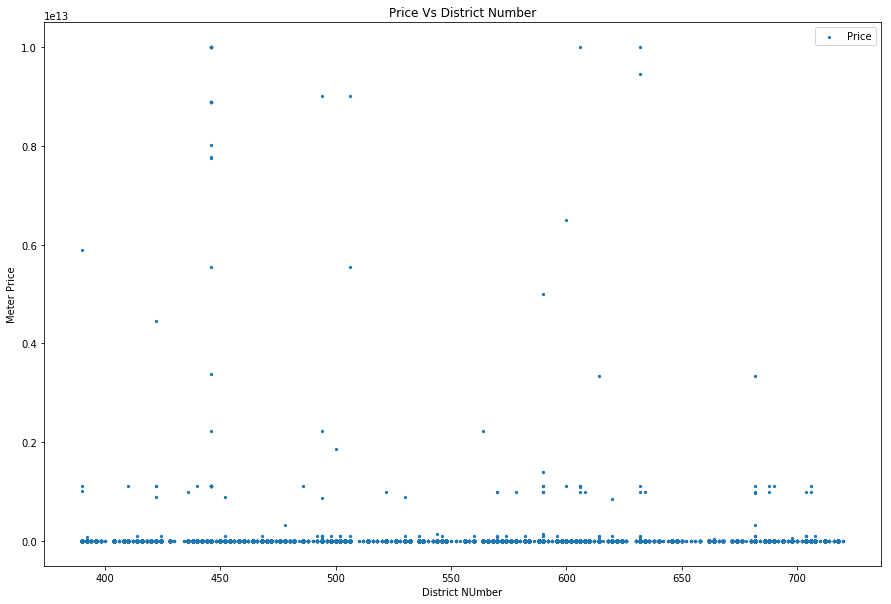

In [5]:
rcParams['figure.figsize'] = 15, 10
plt.scatter(hosue_df.District_id, hosue_df.Price, s = 5)
plt.xlabel('District NUmber')
plt.ylabel('Meter Price')
plt.title('Price Vs District Number')
plt.legend()
plt.show()

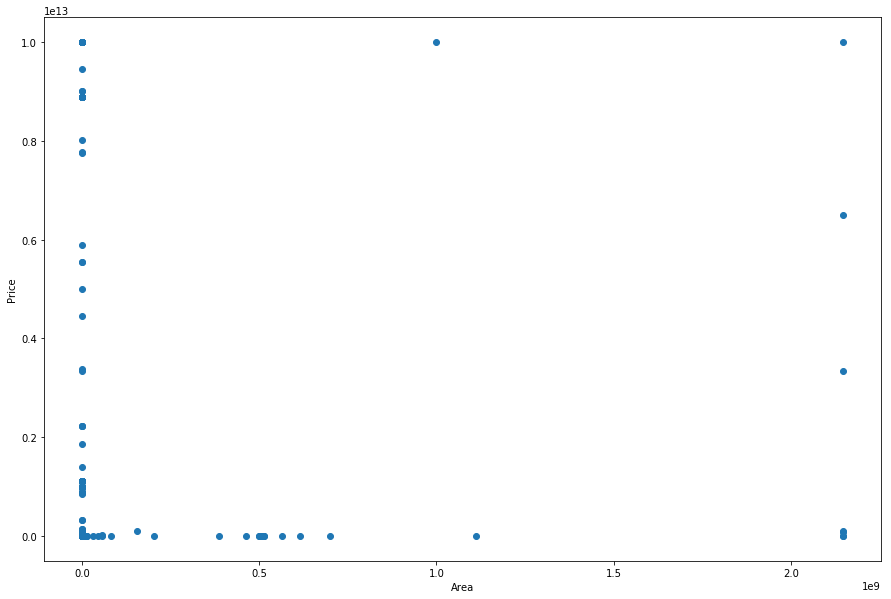

In [6]:
plt.scatter(hosue_df[['Area m2']].values, hosue_df[['Price']].values)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

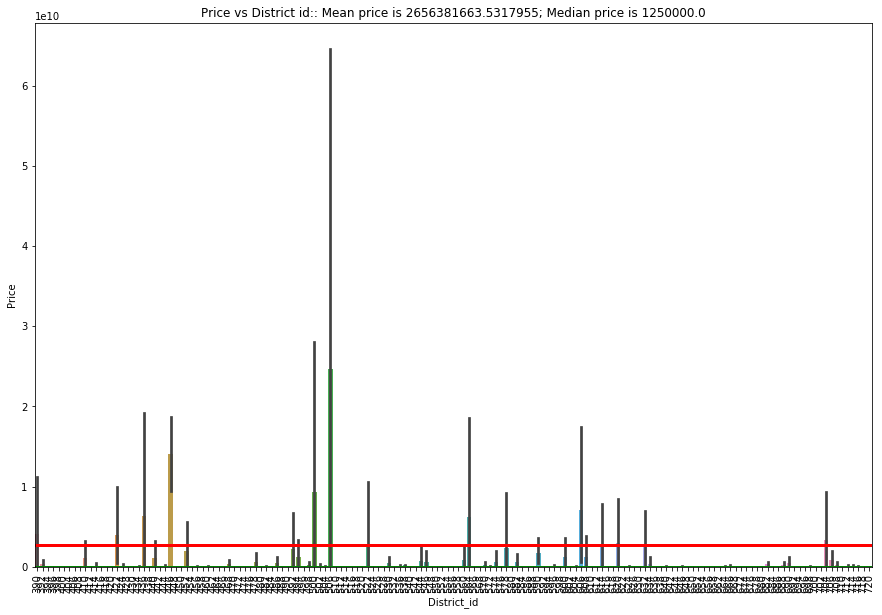

In [7]:
mean = np.mean(hosue_df.Price);median = np.median(hosue_df.Price)
sns.barplot(x="District_id", y="Price", data = hosue_df)
plt.axhline(y = mean, linewidth=3, color='r')
plt.axhline(y = median, linewidth=3, color='g')
plt.title('Price vs District id:: Mean price is %s; Median price is %s'%(mean, median))
plt.xticks(rotation = 90)
plt.show()

# Explanation for Skewness and Kurtosis

#### Positive Skewness: means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.

#### Negative Skewness: is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

###### Area
###### Price
###### Apartments
###### Living Rooms
###### Street Width
###### Age
###### Pool
###### Furnished
###### Basement and Lift all have positive skew, meaning their average and median values is more than the highest occuring value. so it would be better to remove this mode values to balance the dataset.

##### The soution to balancing the data is removing outliers and that we would consider at later stage of the project

In [8]:
print('See data description: {}'.format(hosue_df.describe()))
print('Skew of data: {}'.format(hosue_df.skew()))
print('Kurt of data: {}'.format(hosue_df.kurt()))


See data description:          District_id       Area m2         Price    With Images  \
count  156485.000000  1.564850e+05  1.564850e+05  156485.000000   
mean      572.999840  1.525738e+05  2.656382e+09       0.870007   
std        97.277814  1.551792e+07  1.403750e+11       0.336297   
min       390.000000  0.000000e+00  1.000000e+00       0.000000   
25%       486.000000  3.150000e+02  9.500000e+05       1.000000   
50%       590.000000  3.900000e+02  1.250000e+06       1.000000   
75%       682.000000  4.650000e+02  1.750000e+06       1.000000   
max       720.000000  2.147480e+09  1.000000e+13       1.000000   

           Bed Rooms     Apartments   Living Rooms             WC  \
count  156485.000000  156485.000000  156485.000000  156485.000000   
mean        4.552117       1.253481       2.074454       4.408339   
std         0.829863       1.304234       1.130427       0.855093   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000       0.

###### Data looks unevenly distributed from the histogram. A mix of positive and negativly skewed features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdccf523a20>,
      dtype=object)

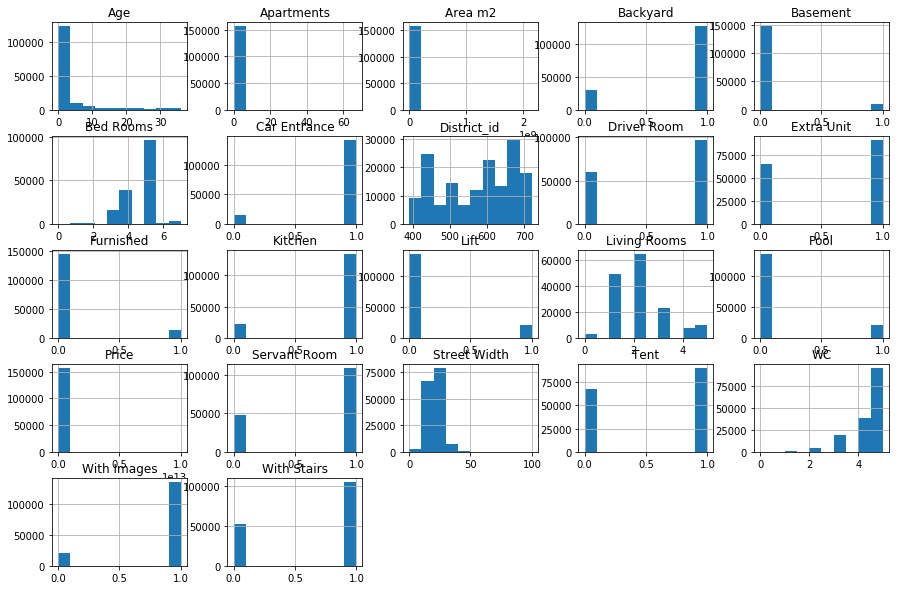

In [9]:
hosue_df.hist()

In [10]:
def standardize_houseprize(df, standardize = None, 
                           logg = None, normalize = None):
  df = df.copy(deep = True)
  #drop all objects
  #and leaving all float64 and int64 datatypes
  for ii in df.columns:
    if df[ii].dtype == object:
      df = df.drop(ii, axis = 1)
  
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
  else:
    pass
    
  return df

df = standardize_houseprize(hosue_df)
df_standard = standardize_houseprize(hosue_df, standardize = True)
log_data = standardize_houseprize(hosue_df, logg=True)
df_normal = standardize_houseprize(hosue_df, normalize = True)

0 District_id
1 Area m2
2 Price
3 With Images
4 Bed Rooms
5 Apartments
6 Living Rooms
7 WC
8 Street Width
9 With Stairs
10 Age
11 Driver Room
12 Servant Room
13 Pool
14 Furnished
15 Tent
16 Backyard
17 Kitchen
18 Extra Unit
19 Car Entrance
20 Basement
21 Lift


In [15]:
log_data.tail()

District_id   Area m2      Price  With Images  Bed Rooms  \
date                                                                            
2019-03-28 08:34:56     6.536692  5.817111  13.997832          0.0   1.609438   
2019-03-28 08:36:01     6.448889  5.783825  14.346139          0.0   1.609438   
2019-03-28 08:37:45     6.536692  5.529429  13.795308          0.0   1.609438   
2019-03-28 08:41:23     6.536692  5.817111  13.997832          0.0   1.609438   
2019-03-28 08:42:15     6.536692  5.817111  13.997832          0.0   1.609438   

                     Apartments  Living Rooms        WC  Street Width  \
date                                                                    
2019-03-28 08:34:56         0.0      0.693147  1.609438      2.995732   
2019-03-28 08:36:01         0.0      0.693147  1.386294      2.708050   
2019-03-28 08:37:45         0.0      0.693147  1.609438      2.995732   
2019-03-28 08:41:23         0.0      0.000000  1.386294      2.708050   
2019-03-28 08:42:15         0.0      0.693147  1.609438      2.708050   

                     With Stairs  ...  Servant Room  Pool  Furnished  Tent  \
date                              ...                                        
2019-03-28 08:34:56          0.0  ...           0.0   0.0        0.0   0.0   
2019-03-28 08:36:01          0.0  ...           0.0   0.0        0.0   0.0   
2019-03-28 08:37:45          0.0  ...           0.0   0.0        0.0   0.0   
2019-03-28 08:41:23          0.0  ...           0.0   0.0        0.0   0.0   
2019-03-28 08:42:15          0.0  ...           0.0   0.0        0.0   0.0   

                     Backyard  Kitchen  Extra Unit  Car Entrance  Basement  \
date                                                                         
2019-03-28 08:34:56       0.0      0.0         0.0           0.0       0.0   
2019-03-28 08:36:01       0.0      0.0         0.0           0.0       0.0   
2019-03-28 08:37:45       0.0      0.0         0.0           0.0       0.0   
2019-03-28 08:41:23       0.0      0.0         0.0           0.0       0.0   
2019-03-28 08:42:15       0.0      0.0         0.0           0.0       0.0   

                     Lift  
date                       
2019-03-28 08:34:56   0.0  
2019-03-28 08:36:01   0.0  
2019-03-28 08:37:45   0.0  
2019-03-28 08:41:23   0.0  
2019-03-28 08:42:15   0.0  

[5 rows x 22 columns]

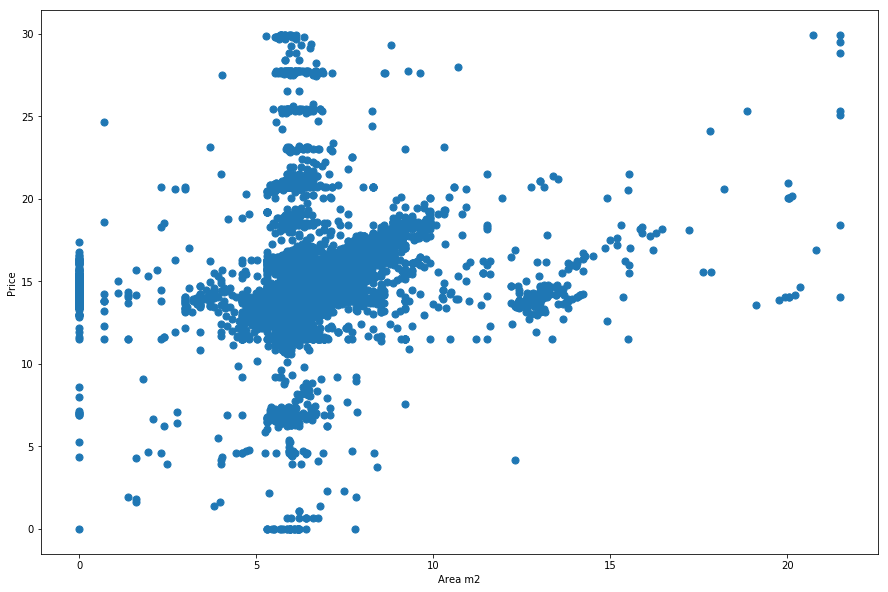

In [19]:
plt.scatter(log_data[['Area m2']].values, log_data[['Price']].values, s = 50)
plt.xlabel('Area m2')
plt.ylabel('Price')
plt.show()

In [25]:
df_standard.head(5)

District_id   Area m2     Price  With Images  Bed Rooms  \
date                                                                           
2016-03-28 08:57:32    -1.860655 -0.009813 -0.018920     0.386544  -1.870335   
2016-03-28 09:10:47     1.367224 -0.009806 -0.018908     0.386544   0.539709   
2016-03-28 09:27:01     1.243866 -0.009819 -0.018915     0.386544  -0.665313   
2016-03-28 09:34:38     0.770992 -0.009816 -0.018919    -2.587026  -0.665313   
2016-03-28 10:26:39    -1.634498 -0.009808 -0.018917     0.386544   0.539709   

                     Apartments  Living Rooms        WC  Street Width  \
date                                                                    
2016-03-28 08:57:32   -0.961089     -0.950488 -1.647007     -1.449542   
2016-03-28 09:10:47    0.572383      0.818760  0.691928      0.241658   
2016-03-28 09:27:01   -0.961089     -0.065864 -1.647007      0.241658   
2016-03-28 09:34:38   -0.961089     -0.950488 -1.647007      0.241658   
2016-03-28 10:26:39   -0.961089     -0.065864  0.691928     -0.603942   

                     With Stairs  ...  Servant Room      Pool  Furnished  \
date                              ...                                      
2016-03-28 08:57:32    -1.409482  ...     -1.505898 -0.398966  -0.300862   
2016-03-28 09:10:47     0.709480  ...      0.664056 -0.398966  -0.300862   
2016-03-28 09:27:01     0.709480  ...      0.664056 -0.398966  -0.300862   
2016-03-28 09:34:38    -1.409482  ...     -1.505898 -0.398966  -0.300862   
2016-03-28 10:26:39    -1.409482  ...     -1.505898 -0.398966  -0.300862   

                         Tent  Backyard   Kitchen  Extra Unit  Car Entrance  \
date                                                                          
2016-03-28 08:57:32  0.864095  0.482590  0.413274    0.847478       0.32368   
2016-03-28 09:10:47  0.864095  0.482590  0.413274    0.847478       0.32368   
2016-03-28 09:27:01 -1.157280 -2.072151  0.413274   -1.179972       0.32368   
2016-03-28 09:34:38 -1.157280  0.482590  0.413274   -1.179972       0.32368   
2016-03-28 10:26:39 -1.157280  0.482590  0.413274    0.847478       0.32368   

                     Basement      Lift  
date                                     
2016-03-28 08:57:32 -0.255438 -0.394359  
2016-03-28 09:10:47 -0.255438 -0.394359  
2016-03-28 09:27:01 -0.255438 -0.394359  
2016-03-28 09:34:38 -0.255438 -0.394359  
2016-03-28 10:26:39 -0.255438 -0.394359  

[5 rows x 22 columns]

In [20]:
#--converting log back to natural number
# loge = logResult
# if x = natural number
# x = exp(logResult)
import math
print(math.ceil(np.exp(13.399995)))

660000


In [26]:
log_data.head(5)

District_id   Area m2      Price  With Images  Bed Rooms  \
date                                                                            
2016-03-28 08:57:32     5.971262  5.703782  13.091904          0.0   1.098612   
2016-03-28 09:10:47     6.559615  6.016157  14.603968          0.0   1.609438   
2016-03-28 09:27:01     6.542472  5.298317  14.038654          0.0   1.386294   
2016-03-28 09:34:38     6.473891  5.501258  13.399995          0.0   1.386294   
2016-03-28 10:26:39     6.025866  5.926926  13.764217          0.0   1.609438   

                     Apartments  Living Rooms        WC  Street Width  \
date                                                                    
2016-03-28 08:57:32    0.000000      0.000000  1.098612      2.302585   
2016-03-28 09:10:47    0.693147      1.098612  1.609438      2.995732   
2016-03-28 09:27:01    0.000000      0.693147  1.098612      2.995732   
2016-03-28 09:34:38    0.000000      0.000000  1.098612      2.995732   
2016-03-28 10:26:39    0.000000      0.693147  1.609438      2.708050   

                     With Stairs  ...  Servant Room  Pool  Furnished  Tent  \
date                              ...                                        
2016-03-28 08:57:32          0.0  ...           0.0   0.0        0.0   0.0   
2016-03-28 09:10:47          0.0  ...           0.0   0.0        0.0   0.0   
2016-03-28 09:27:01          0.0  ...           0.0   0.0        0.0   0.0   
2016-03-28 09:34:38          0.0  ...           0.0   0.0        0.0   0.0   
2016-03-28 10:26:39          0.0  ...           0.0   0.0        0.0   0.0   

                     Backyard  Kitchen  Extra Unit  Car Entrance  Basement  \
date                                                                         
2016-03-28 08:57:32       0.0      0.0         0.0           0.0       0.0   
2016-03-28 09:10:47       0.0      0.0         0.0           0.0       0.0   
2016-03-28 09:27:01       0.0      0.0         0.0           0.0       0.0   
2016-03-28 09:34:38       0.0      0.0         0.0           0.0       0.0   
2016-03-28 10:26:39       0.0      0.0         0.0           0.0       0.0   

                     Lift  
date                       
2016-03-28 08:57:32   0.0  
2016-03-28 09:10:47   0.0  
2016-03-28 09:27:01   0.0  
2016-03-28 09:34:38   0.0  
2016-03-28 10:26:39   0.0  

[5 rows x 22 columns]

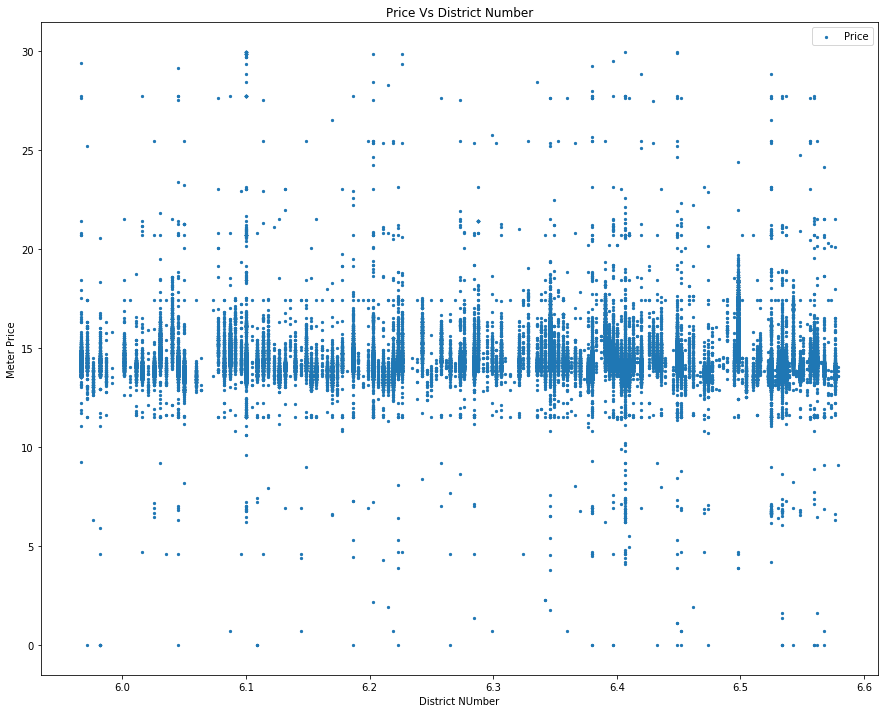

In [23]:
rcParams['figure.figsize'] = 15, 12
plt.scatter(log_data.District_id, log_data.Price, s = 5)
plt.xlabel('District NUmber')
plt.ylabel('Meter Price')
plt.title('Price Vs District Number')
plt.legend()
plt.show()

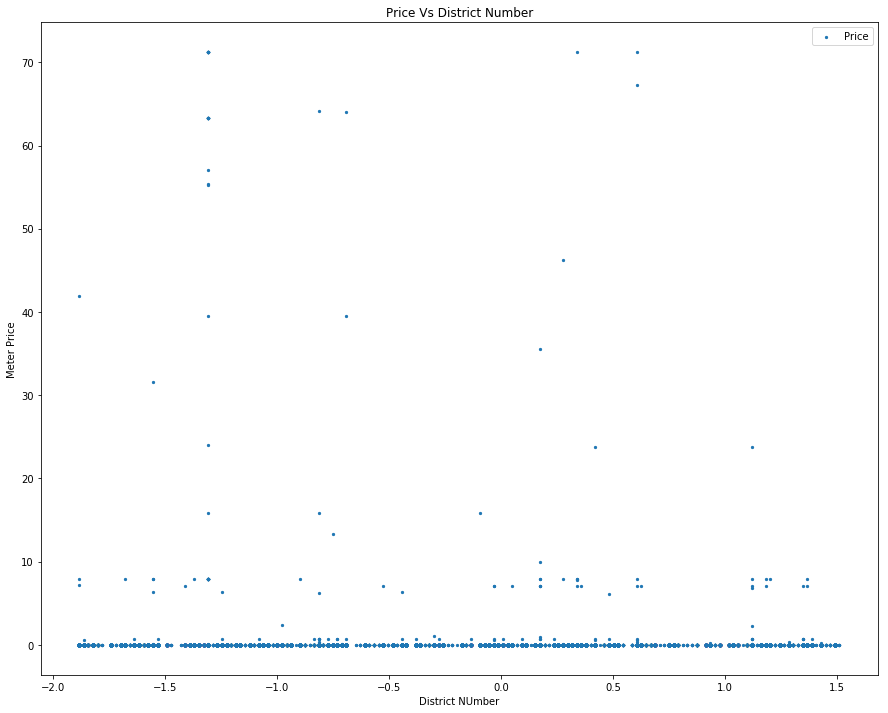

In [24]:
rcParams['figure.figsize'] = 15, 12
plt.scatter(df_standard.District_id, df_standard.Price, s = 5)
plt.xlabel('District NUmber')
plt.ylabel('Meter Price')
plt.title('Price Vs District Number')
plt.legend()
plt.show()

#### Quite a few amount of data we should consider as outliers here. The red line is a boundary to better understand the huge deviation here.

Text(0.5, 1.0, 'Plot of count against price on a log scale')

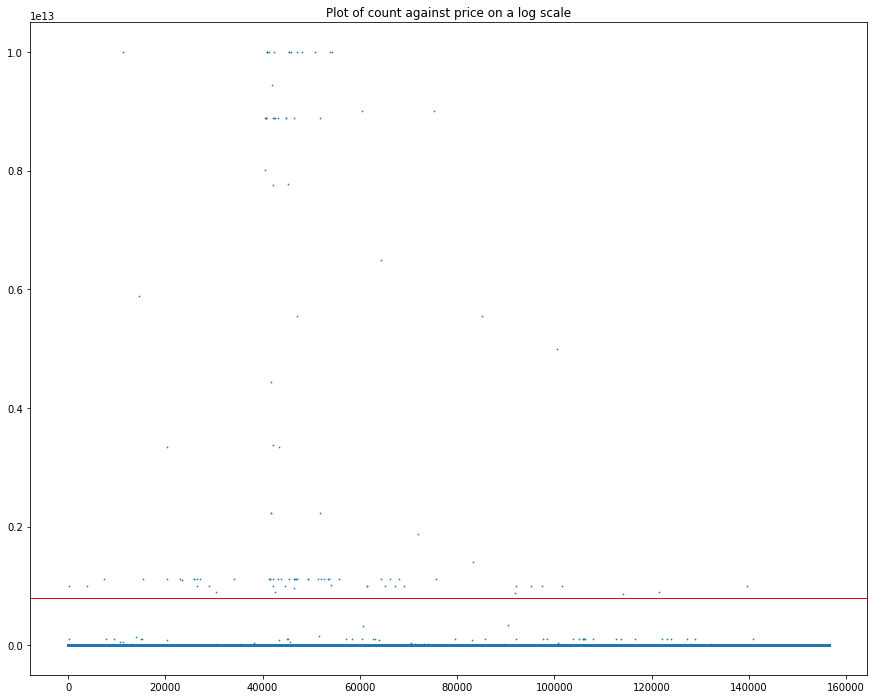

In [25]:
rcParams['figure.figsize'] = 15, 12
plt.scatter(np.arange(hosue_df.shape[0]), hosue_df.Price, s = .5)
plt.axhline(y = .08e13, linewidth=1, color='r')
plt.title('Plot of count against price on a log scale')

##### From the log_data it is evident we have outliers below and certain percentile and above a certain percentile

Text(0.5, 1.0, 'Plot of count against price on a log scale')

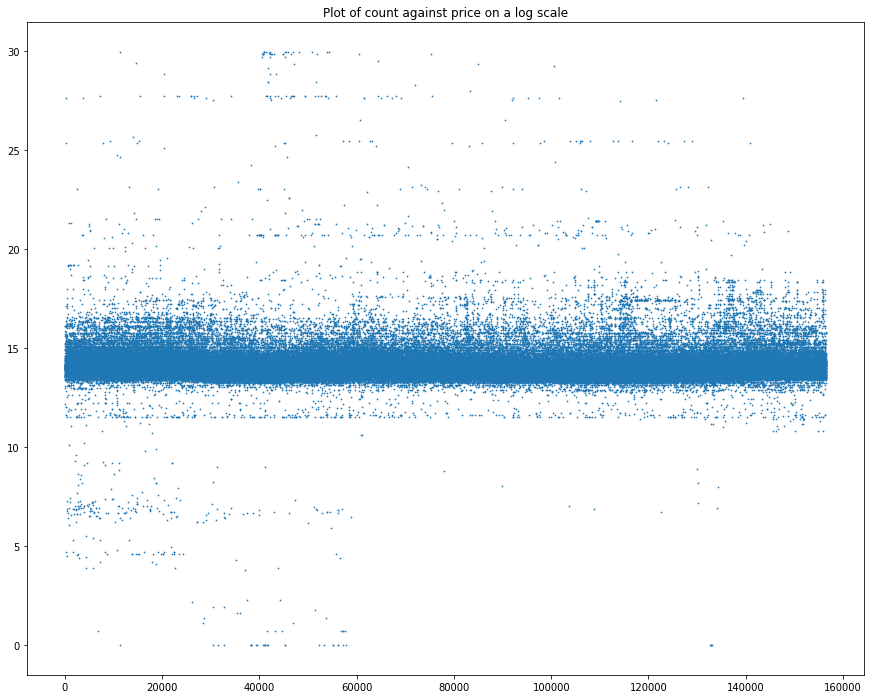

In [26]:
rcParams['figure.figsize'] = 15, 12
plt.scatter(np.arange(log_data.shape[0]), log_data.Price, s = .5)
plt.title('Plot of count against price on a log scale')

#### Even more clearly with a box plot, we can see the price outliers very clearly. Price and Area do share a huge amount of those outliers even for a log data

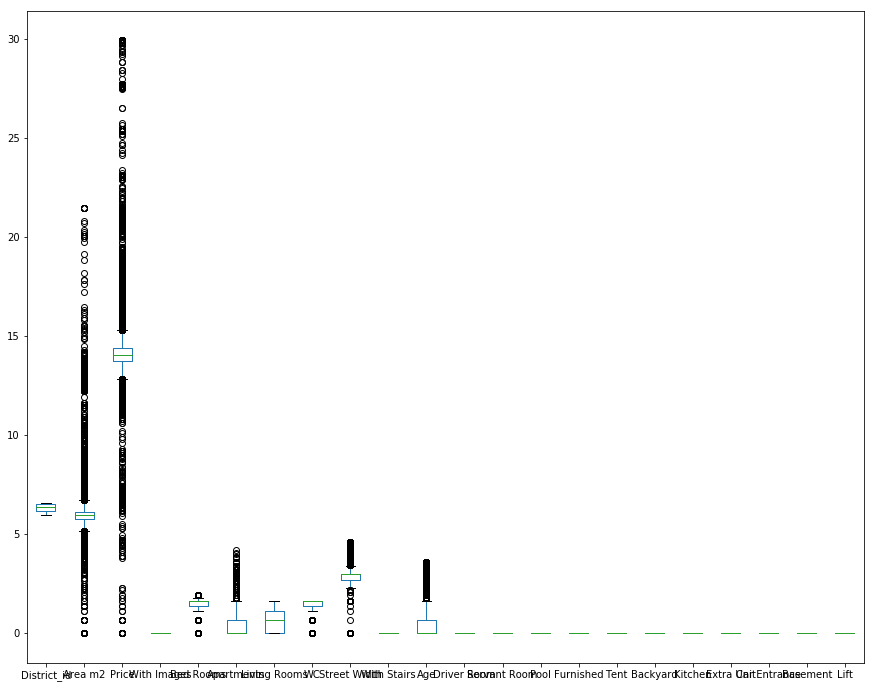

In [27]:
rcParams['figure.figsize'] = 15, 12
log_data.plot(kind='box')

<h1> CLUSTER ANALYSIS</h1>

In [992]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.spatial.distance import cdist

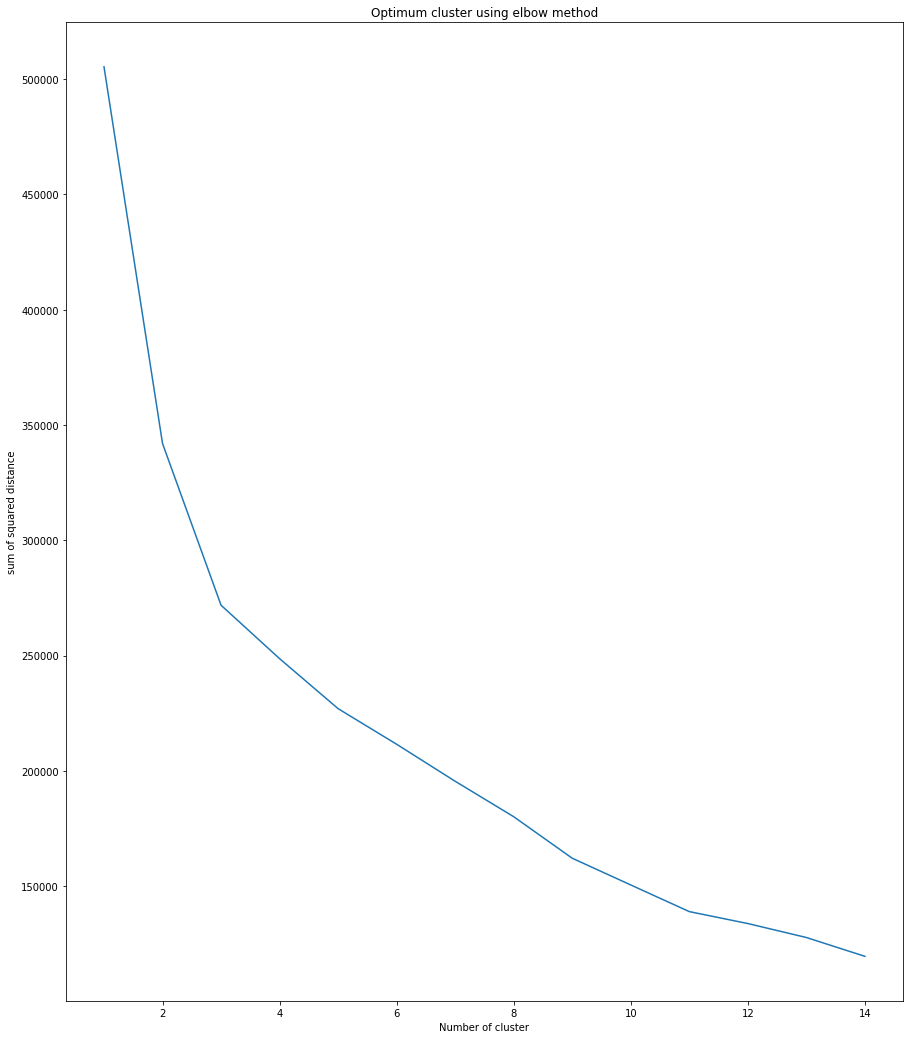

In [993]:
#finding optimum numbers of clusters/groups
sum_of_squared_distance = []
for i in range(1, 15):
    kmeans_ = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 500, n_init = 10, random_state = 0,
                    n_jobs = -1)
    kmeans_.fit(log_data)
    #same as kmeans.inerta
    sum_of_squared_distance.append(kmeans_.inertia_)
    
plt.plot(range(1, 15), sum_of_squared_distance)
plt.title('Optimum cluster using elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('sum of squared distance')
plt.show()

In [994]:
kmeans_ = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 500, n_init = 10, random_state = 0,
                    n_jobs = -1)

In [1012]:
y_means = kmeans_.fit_predict(df_standard[features])

In [1013]:
np.unique(y_means)

array([0, 1, 2], dtype=int32)

In [1014]:
y_means

array([0, 1, 1, ..., 0, 0, 1], dtype=int32)

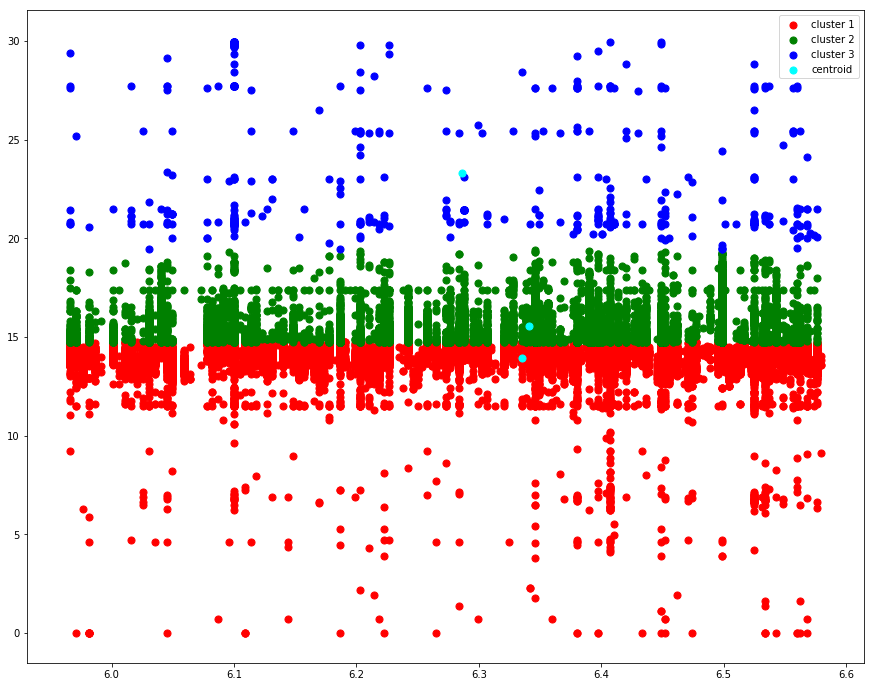

In [50]:
rcParams['figure.figsize'] = 15, 12
plt.scatter(log_data[['District_id', 'Price']].values[y_means == 0, 0], log_data[['District_id', 'Price']].values[y_means == 0, 1], s = 50, c = 'red', label = 'cluster 1')
plt.scatter(log_data[['District_id', 'Price']].values[y_means == 1, 0], log_data[['District_id', 'Price']].values[y_means == 1, 1], s = 50, c = 'green', label = 'cluster 2')
plt.scatter(log_data[['District_id', 'Price']].values[y_means == 2, 0], log_data[['District_id', 'Price']].values[y_means == 2, 1], s = 50, c = 'blue', label = 'cluster 3')
plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], s = 50, c = 'cyan', label = 'centroid')
plt.legend()
plt.show()

#### What i can conlcude here is taking the green and blue points as outliers or anomaly.

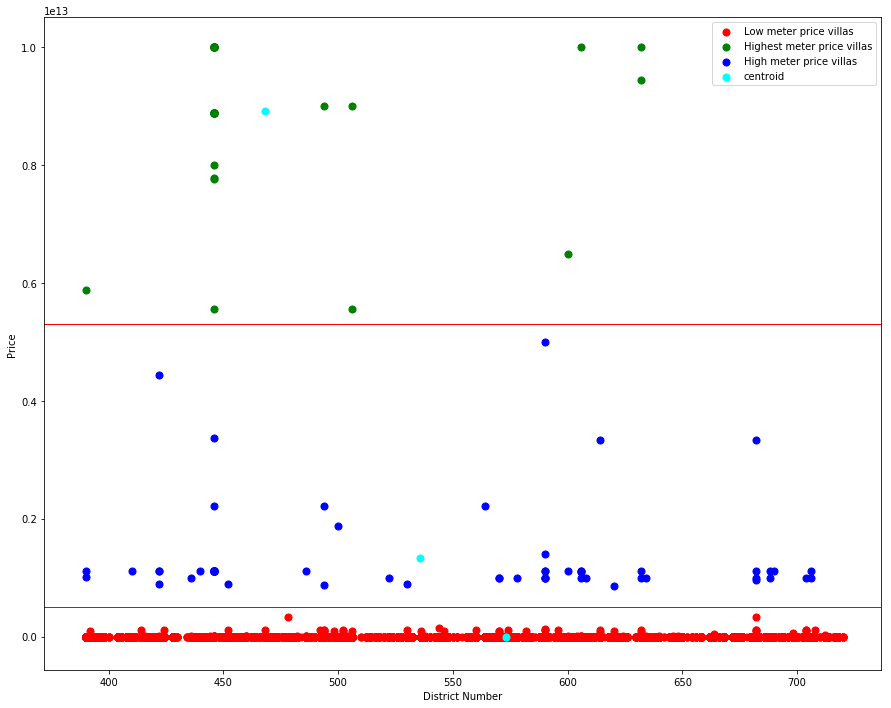

In [1011]:
rcParams['figure.figsize'] = 15, 12
y_means = kmeans_.fit_predict(hosue_df[['District_id', 'Price']])
plt.scatter(hosue_df[['District_id', 'Price']].values[y_means == 0, 0], hosue_df[['District_id', 'Price']].values[y_means == 0, 1], s = 50, c = 'red', label = 'Low meter price villas')
plt.scatter(hosue_df[['District_id', 'Price']].values[y_means == 1, 0], hosue_df[['District_id', 'Price']].values[y_means == 1, 1], s = 50, c = 'green', label = 'Highest meter price villas')
plt.scatter(hosue_df[['District_id', 'Price']].values[y_means == 2, 0], hosue_df[['District_id', 'Price']].values[y_means == 2, 1], s = 50, c = 'blue', label = 'High meter price villas')
plt.scatter(kmeans_.cluster_centers_[:, 0], kmeans_.cluster_centers_[:, 1], s = 50, c = 'cyan', label = 'centroid')
plt.axhline(y = 0.53e13, linewidth=1, color='r')
plt.axhline(y = 0.05e13, linewidth=1, color='r')
plt.xlabel('District Number')
plt.ylabel('Price')
plt.legend()
plt.show()


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156]), <a list of 157 Text xticklabel objects>)

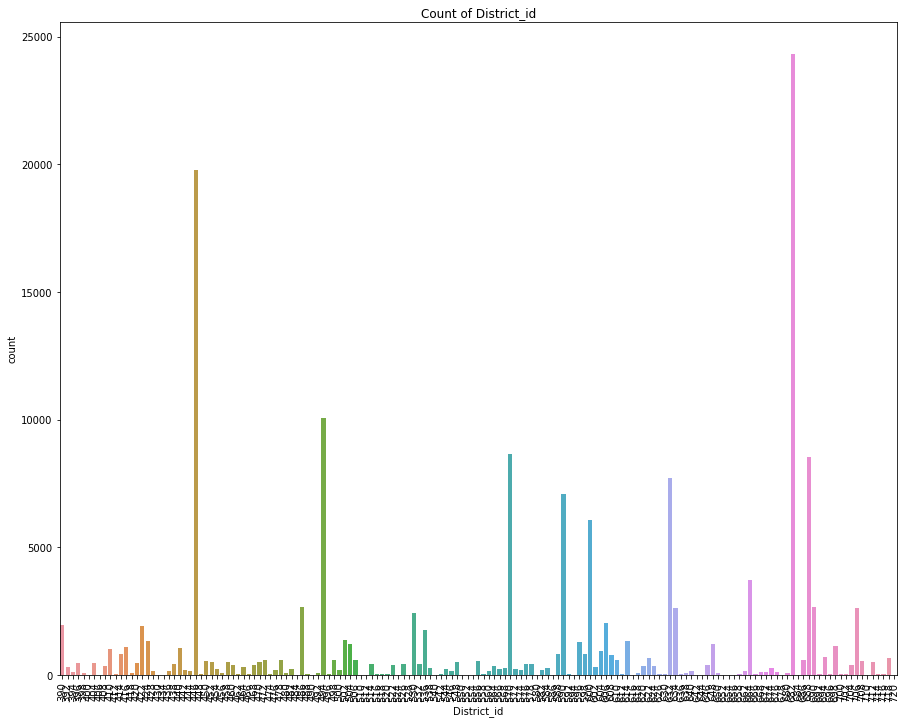

In [56]:
rcParams['figure.figsize'] = 15, 12
x = 'District_id'
sns.countplot(x = x, data = low_villas)
#plt.rotate(90)
plt.title('Count of %s'%x)
plt.xticks(rotation=90)

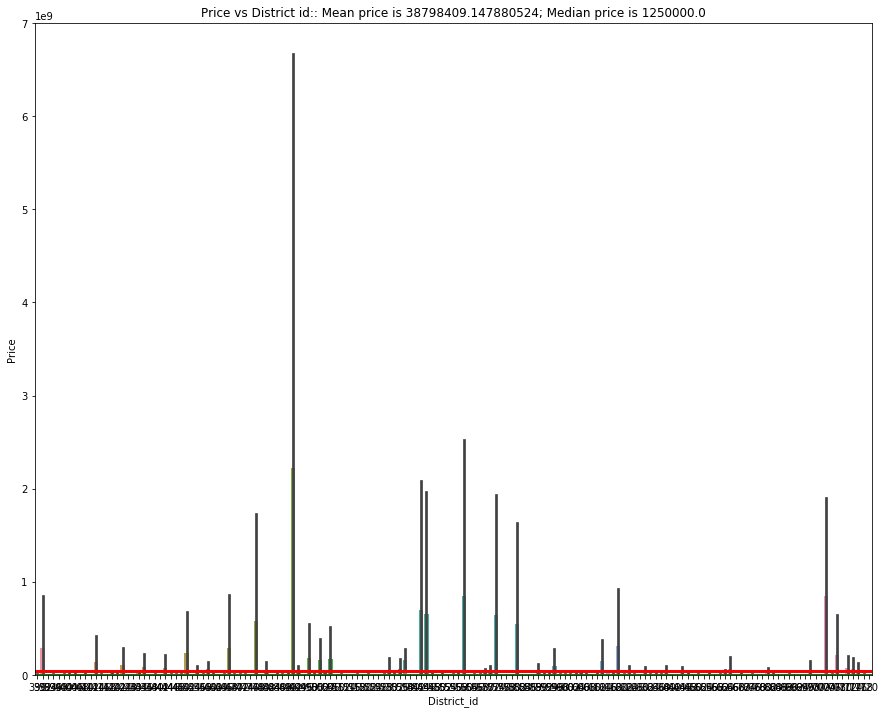

In [252]:
mean = np.mean(low_villas.Price);median = np.median(low_villas.Price)
sns.barplot(x="District_id", y="Price", data = low_villas)
plt.axhline(y = mean, linewidth=3, color='r')
plt.axhline(y = median, linewidth=3, color='g')
plt.title('Price vs District id:: Mean price is %s; Median price is %s'%(mean, median))
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

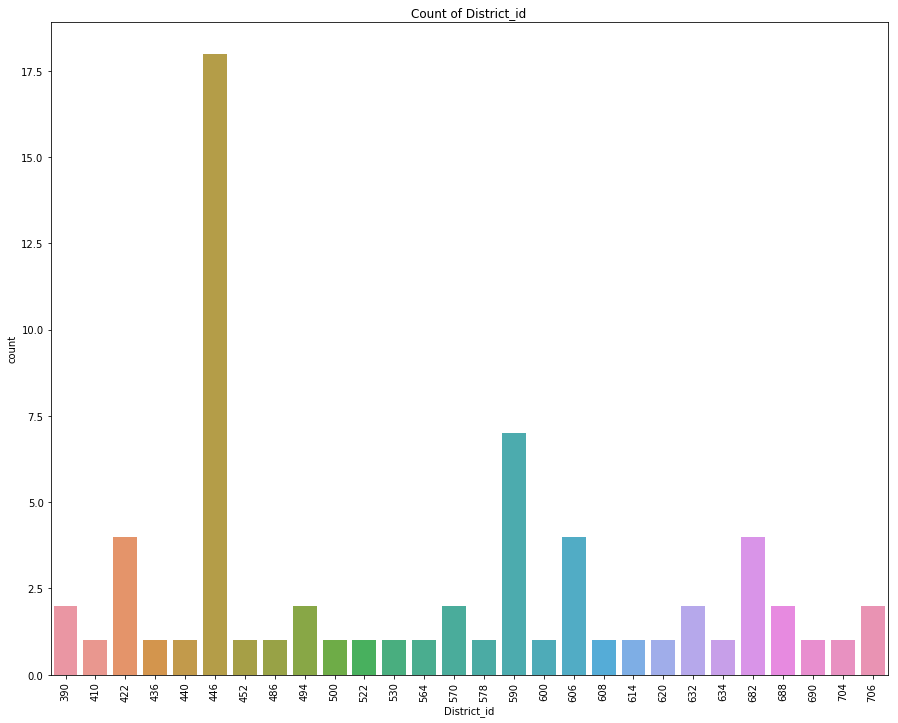

In [168]:
rcParams['figure.figsize'] = 15, 12
x = 'District_id'
sns.countplot(x = x, data = high_villas)
#plt.rotate(90)
plt.title('Count of %s'%x)
plt.xticks(rotation=90)

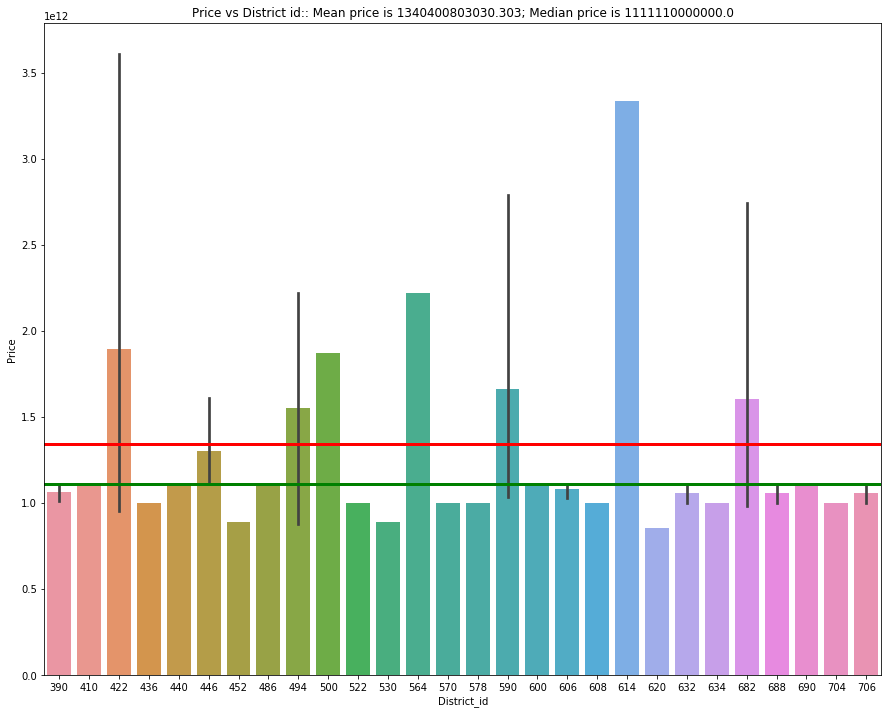

In [192]:
mean = np.mean(high_villas.Price);median = np.median(high_villas.Price)
sns.barplot(x="District_id", y="Price", data = high_villas)
plt.axhline(y = mean, linewidth=3, color='r')
plt.axhline(y = median, linewidth=3, color='g')
plt.title('Price vs District id:: Mean price is %s; Median price is %s'%(mean, median))
plt.show()

In [155]:
highest_villas = hosue_df[hosue_df.Price > 0.53e13]
highest_villas.head(5)

District_id       Area m2           Price  With Images  \
date                                                                          
2016-07-17 02:07:02          606  1.000000e+09  10000000000000            0   
2016-08-11 11:51:51          390  7.000000e+02   5885270000000            0   
2017-02-11 18:12:57          446  2.800000e+02   8888890000000            1   
2017-02-11 21:09:49          446  2.800000e+02   8008890000000            1   
2017-02-12 18:20:56          446  2.800000e+02   8888890000000            1   

                     Bed Rooms  Apartments  Living Rooms   WC  Street Width  \
date                                                                          
2016-07-17 02:07:02        5.0           5             5  5.0           5.0   
2016-08-11 11:51:51        5.0           0             2  5.0          20.0   
2017-02-11 18:12:57        4.0           3             1  4.0          20.0   
2017-02-11 21:09:49        4.0           2             1  4.0          20.0   
2017-02-12 18:20:56        3.0           2             1  4.0          20.0   

                     With Stairs  ...  Servant Room  Pool  Furnished  Tent  \
date                              ...                                        
2016-07-17 02:07:02          1.0  ...           1.0   1.0        1.0   1.0   
2016-08-11 11:51:51          1.0  ...           0.0   0.0        0.0   0.0   
2017-02-11 18:12:57          0.0  ...           0.0   0.0        0.0   1.0   
2017-02-11 21:09:49          0.0  ...           0.0   0.0        0.0   1.0   
2017-02-12 18:20:56          0.0  ...           0.0   0.0        0.0   1.0   

                     Backyard  Kitchen  Extra Unit  Car Entrance  Basement  \
date                                                                         
2016-07-17 02:07:02       1.0      1.0         1.0           1.0       1.0   
2016-08-11 11:51:51       0.0      0.0         0.0           0.0       0.0   
2017-02-11 18:12:57       1.0      1.0         1.0           1.0       0.0   
2017-02-11 21:09:49       1.0      1.0         1.0           1.0       0.0   
2017-02-12 18:20:56       1.0      1.0         1.0           1.0       0.0   

                     Lift  
date                       
2016-07-17 02:07:02   1.0  
2016-08-11 11:51:51   0.0  
2017-02-11 18:12:57   0.0  
2017-02-11 21:09:49   0.0  
2017-02-12 18:20:56   0.0  

[5 rows x 22 columns]

In [156]:
len(highest_villas)

36

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

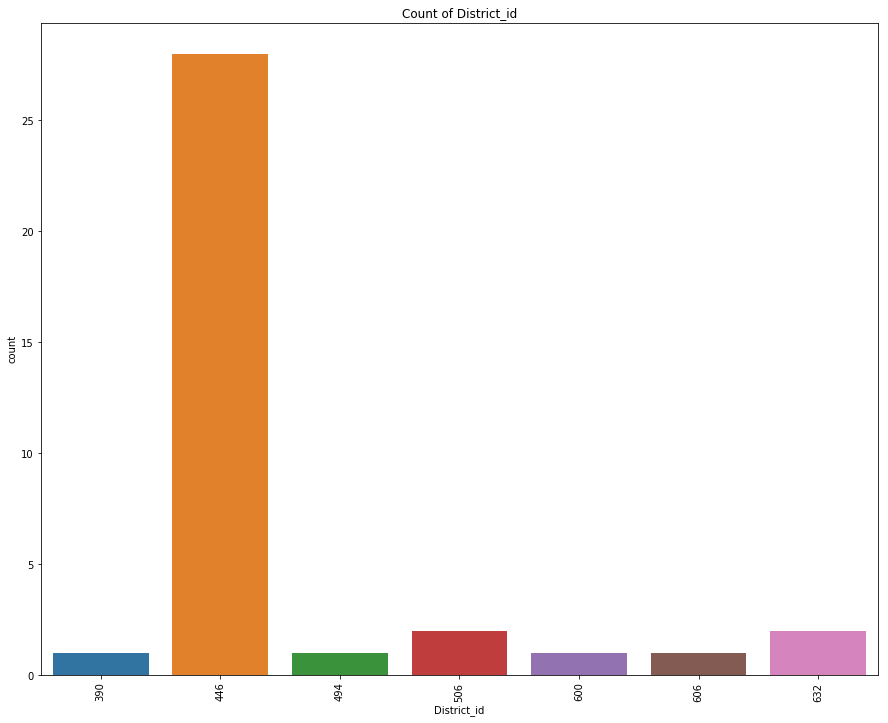

In [170]:
rcParams['figure.figsize'] = 15, 12
x = 'District_id'
sns.countplot(x = x, data = highest_villas)
plt.title('Count of %s'%x)
plt.xticks(rotation=90)

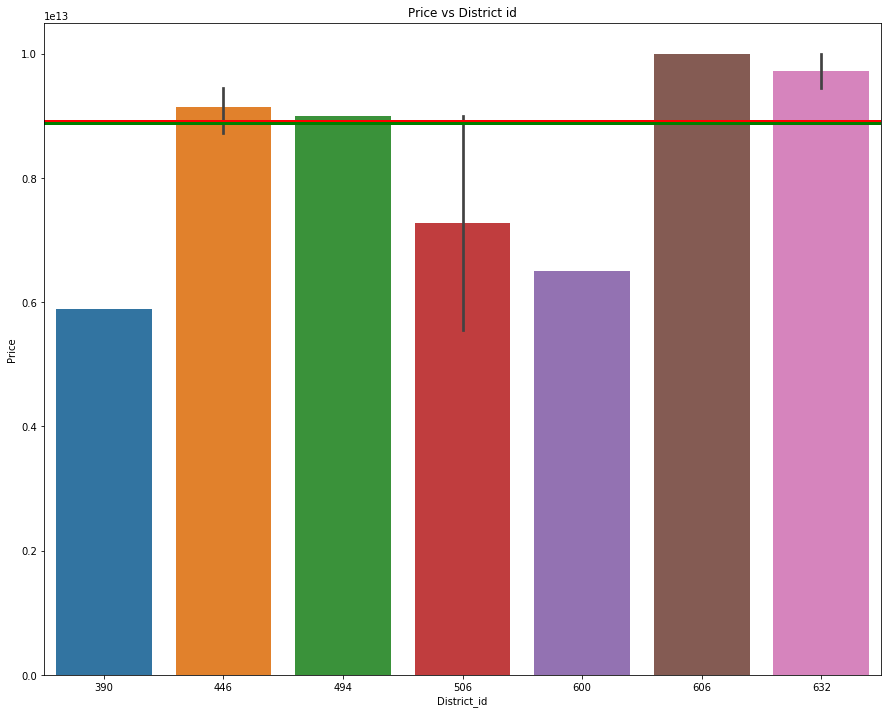

In [194]:
mean = np.mean(highest_villas.Price);median = np.median(highest_villas.Price)
sns.barplot(x="District_id", y="Price", data = highest_villas)
plt.axhline(y = mean, linewidth=3, color='r')
plt.axhline(y = median, linewidth=3, color='g')
plt.title('Price vs District id:: Mean price is %s; Median price is %s'%(mean, median))
plt.title('Price vs District id')
plt.show()

# CORRELATION HEATMAP

###### Houses with Pool most likely have a Basement and a Lift
###### Very high correlation between Price and houses with stairs..The higher the numbers of stairs in a house, the higher the prices of such houses.
###### Houses with Stairs most correlated with Pool and Lift. meaning houses with Stairs most like would have a pool and a lift
###### HIgh appartments numbers are correlated with areas with large street widths
###### HOuses with Extra units have high prices as they are highly correlated.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d81e925f8>,
      dtype=object)

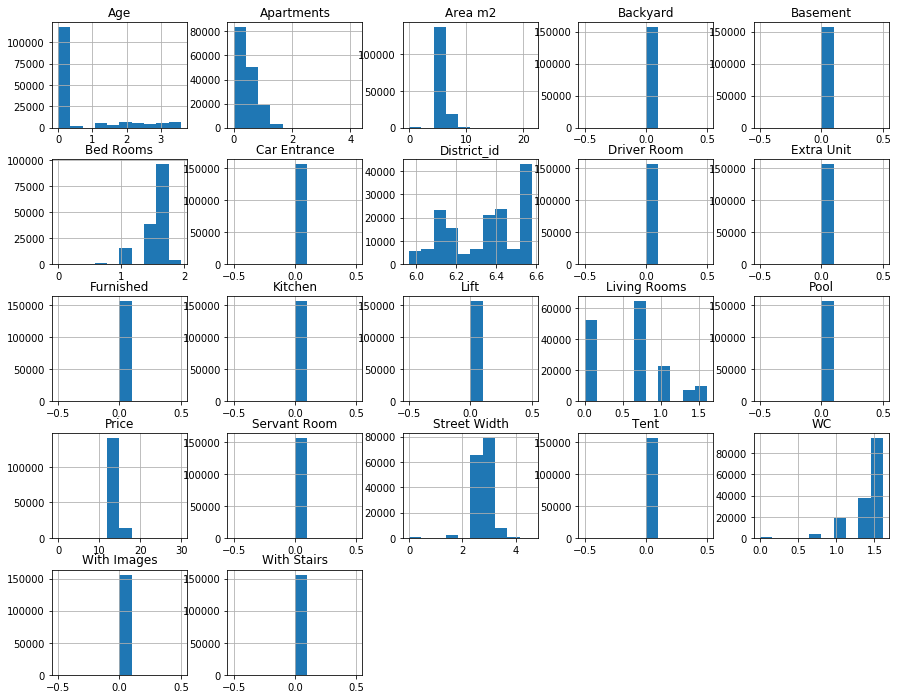

In [198]:
log_data.hist()

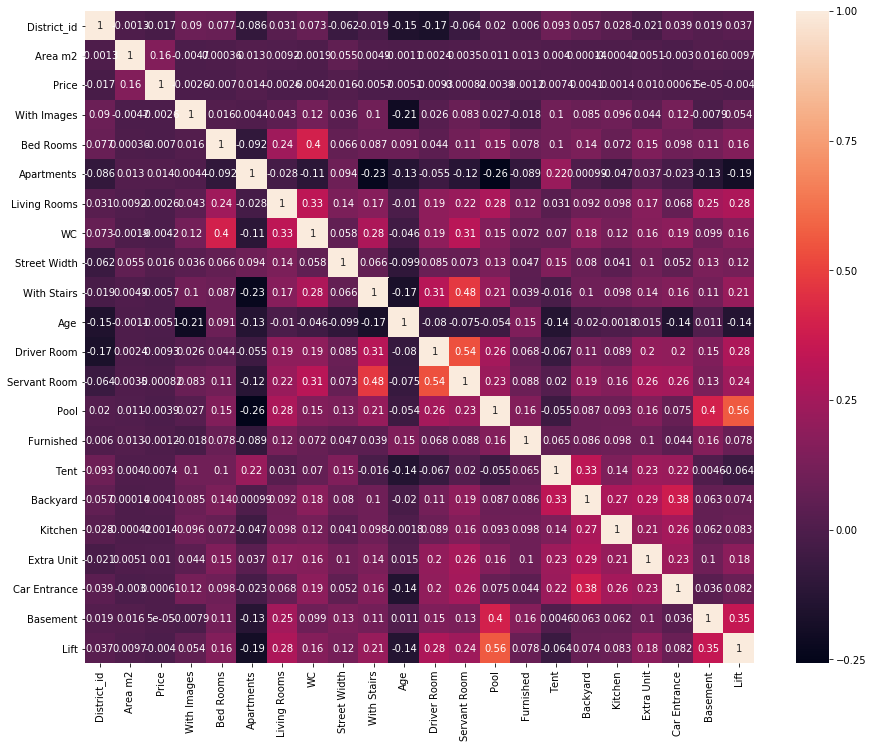

In [199]:
rcParams['figure.figsize'] = 15, 12
sns.heatmap(df_standard.corr(), annot=True);plt.show()

# OUTLIER DETECTION AND REMOVAL

In [302]:
def remove_outliers(df, standardize = None, remove_objects = True,
                    logg = None, normalize = None, 
                    lower_quartile = None, upper_quartile = None, multiplier = None):
  
  #drop all objects
  #and leaving all float64 and int64 datatypes
  if remove_objects:
    for ii in df.columns:
      if df[ii].dtype == object:
        df = df.drop(ii, axis = 1)
  else:
    df = df
    df = pd.get_dummies(df, dtype = float)
    
    
    
  df = df.copy(deep = True)
  quart_1 = df.quantile(lower_quartile)
  quart_2 = df.quantile(upper_quartile)
  diff_quart = abs(quart_1 - quart_2)
  df = df[~((df < (quart_1 - 1.5 * diff_quart)) | (df > (quart_2 + 1.5 * diff_quart))).any(axis=1)]
  '''
  #standardize values
        x - mean of x
  z = --------------------
          sd of x
          
  #log values
  
  z = log(x)
  
  #normalize values
  
          x - min(x)
  z = --------------------
          max(x) - min(x)
  '''
  #standard deviation
  def stdev(df):
    return np.std(df, axis = 0)
  #mean deviation
  def mean_dev(df):
    return df - np.mean(df, axis = 0)
  #log of data
  def logg_dat(df):
    return np.log(df)
  
  #standardized values for columns
  if standardize:
    for ii, ij in enumerate(df.columns):
      print(ii, ij)
      df['{}'.format(ij)] = mean_dev(df.loc[:, '{}'.format(ij)])/stdev(df.loc[:, '{}'.format(ij)])
      df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif logg:
    df = logg_dat(df)
    df = df.replace([np.inf, -np.inf, np.nan], 0)
  elif normalize:
    for ii, ij in enumerate(df.columns):
      df['{}'.format(ij)] = (df.loc[:, '{}'.format(ij)] - min(df.loc[:, '{}'.format(ij)]))/\
      (max(df.loc[:, '{}'.format(ij)]) - min(df.loc[:, '{}'.format(ij)]))
      df = df.replace([np.inf, -np.inf, np.nan], 0)
  else:
    pass
    
  return df

lower_quart = .25
upper_quart = .75
multiplier = 1.5
df_no_out = remove_outliers(hosue_df, remove_objects = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_standard_no_out = remove_outliers(hosue_df, remove_objects = True, standardize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
log_data_no_out = remove_outliers(hosue_df, remove_objects = True, logg=True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)
df_normal_no_out = remove_outliers(hosue_df, remove_objects = True, normalize = True, lower_quartile = lower_quart, upper_quartile = upper_quart, multiplier = multiplier)

0 District_id
1 Area m2
2 Price
3 With Images
4 Bed Rooms
5 Apartments
6 Living Rooms
7 WC
8 Street Width
9 With Stairs
10 Age
11 Driver Room
12 Servant Room
13 Pool
14 Furnished
15 Tent
16 Backyard
17 Kitchen
18 Extra Unit
19 Car Entrance
20 Basement
21 Lift


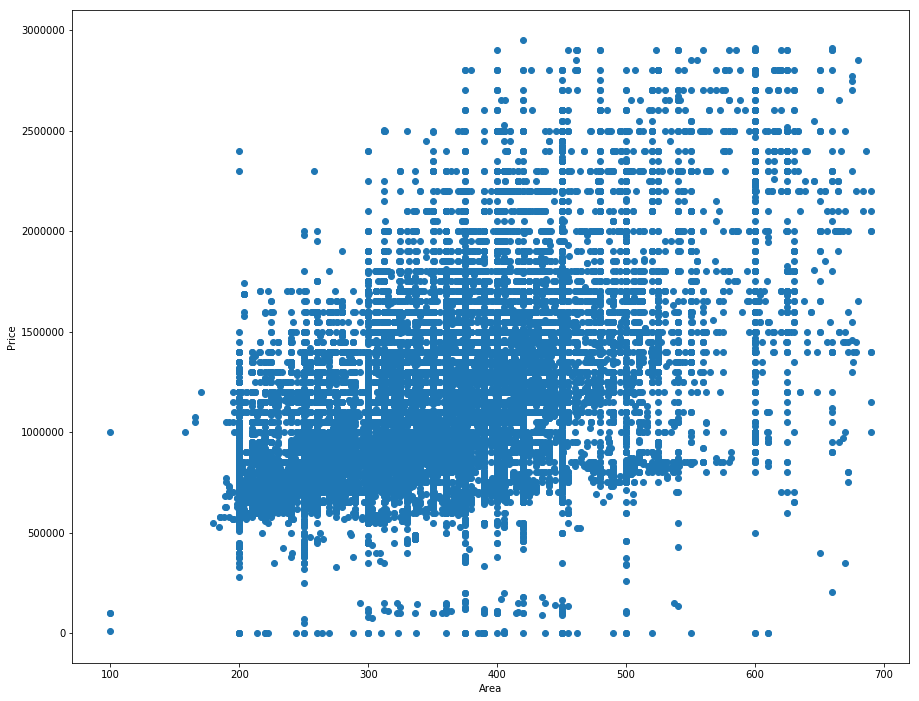

In [1208]:
plt.scatter(df_no_out[['Area m2']].values, df_no_out[['Price']].values)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Multivariant Regression Model

<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h_{(\theta)}^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha^* (1/m .\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha^* (1/m .\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha^* (1/m .\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha^* (1/m .\sum_{i=1}^{m}(h_{(\theta)}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

<b>Gradient Descent</b>

Reapeat{

\begin{equation}
 \theta_j := \theta_j - \alpha^* \frac{\partial J(\theta)}{\partial \theta_j}
\end{equation}
}

<b>Stochastic Gradient Descent</b>

Reapeat{

\begin{equation}
 \theta_j := \theta_j - \alpha^* \frac{\partial J(\theta)}{\partial \theta_j}({X^{(i)}, y^{(i)}})
\end{equation}
}

<b>Minibatch Gradient Descent</b>

Reapeat{

\begin{equation}
 \theta_j := \theta_j - \alpha^* \frac{\partial J(\theta)}{\partial \theta_j}({X^{(i)}_{b}, y^{(i)}_{b}})
\end{equation}
}

In [82]:
log_data.head(2)
log_data.shape

(156485, 22)

In [745]:
constant = np.ones(log_data.shape[0]).reshape(log_data.shape[0], 1); constant.shape

(156485, 1)

In [746]:
import statsmodels.api as sm
#X = np.concatenate((constant, np.array(log_data[['Area m2']])), axis = 1)
X = np.array(df_standard.drop(['Price', 'District_id'], axis = 1))
X = sm.add_constant(X)
Y = np.array(df_standard[['Price']].values).reshape(X.shape[0],)

In [751]:
Y.shape

(156485,)

In [734]:
#Multivariant Regression using Closed form
class Regression(object):
    def __init__(self):
        return
    
    def fit_predict(self, X, Y):
        self.X = X
        self.Y = Y
        #--either beta syntax below would work
        #beta = np.linalg.solve(np.dot(self.X.T, self.X), np.dot(self.X.T, self.Y))
        beta = np.linalg.inv(self.X.T.dot(self.X)).dot(self.X.T).dot(self.Y)
        Y_hat = self.X.dot(beta)
        return Y_hat
    
    #-Mean Square Error
    def RMSE(self, yh, y):
        return np.sqrt(np.square(yh - y).mean())
    #-Mean Square Error
    def MSE(self, yh, y):
        return np.square(yh - y).mean()
    #-Mean Absolute Error
    def MAE(self, yh, y):
        return np.abs(yh - y).mean()
    #-R-squared Error
    def R_squared(self, yh, y):
        #-- R_square = 1 - (SS[reg]/SS[total])
        # 1 - (y-yh).dot(y-yh)/(y - y.mean()).dot(y - y.mean()) OR
        return (1 -(np.sum(np.square(y - yh))/np.sum(np.square(y - y.mean()))))
        
    def summary(self, X, y, y_hat):
        #y_hat = self.fit_predict(self.X, self.Y)
        print('*'*40)
        print('\t\tSummary')
        print('*'*40)
        print('RMSE: %s'%(self.RMSE(y_hat,  Y)))
        print('*'*40)
        print('MSE: %s'%(self.MSE(y_hat,  Y)))
        print('*'*40)
        print('MAE: %s'%(self.MAE(y_hat,  Y)))
        print('*'*40)
        print('R_squared = %s'%(self.R_squared(y_hat,  Y)))
        print('*'*40)
    
    def plot(self, X, Y, y_hat):
        import matplotlib.pyplot as plt
        plt.plot(np.arange(X.shape[0]), Y)
        plt.plot(np.arange(X.shape[0]), y_hat)
        plt.title('True vlaue vs Predicted value')
        plt.xlabel('Data point')
        plt.ylabel('True vlaue vs Predicted value')
        
class GradientDescent(Regression):
    '''
    Inherits Regression class
    '''
    def __init__(self):
        super().__init__()
        return
    
    def cost(self, X, Y, beta):
        '''
        param: X = training examples/data. column vector <x1, x2, ...., xn | x E R^D>
        param: Y = target. vector  <y | y E R^DX1>
        param: beta = coefficients, e.g b0, b1
        Return: cost
        '''
        return (1/2*len(Y)) * np.sum(np.square(X.dot(beta) - Y))
    
    def GD(self, X, Y, beta, alpha, iterations, early_stopping = None):
        '''
        param: X = NxD feature matrix
        param: Y = Dx1 column vector
        param: beta = Dx1 beta vector coefficients
        param: alpha = learning rate. Default 1e-2
        param: iterations = Number of times to run. Default 1000
        
        Return type; final beta/coefficients, cost and bata iterations
        '''
        cost_rec = np.zeros(iterations)
        beta_rec = np.zeros((iterations, X.shape[1]))
        if early_stopping:
            for ii in range(iterations):
                #compute gradient
                beta = beta - (1/len(Y)) *(alpha) * (np.dot(X.T, (np.dot(X,beta) - Y)))
                beta_rec[ii, :] = beta.T
                cost_rec[ii] = self.cost(X, Y, beta)
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))
                #--compare last and previous value. stop if they are the same
                if not cost_rec[ii] == cost_rec[ii -1]:
                    continue
                else:
                    break
            y_hat = X.dot(beta)
            return beta, cost_rec[:ii], beta_rec, y_hat, ii
        else:
            for ii in range(iterations):
                #compute gradient
                beta = beta - (1/len(Y)) *(alpha) * (np.dot(X.T, (np.dot(X,beta) - Y)))
                beta_rec[ii, :] = beta.T
                cost_rec[ii] = self.cost(X, Y, beta)
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec, beta_rec, y_hat, ii
        
    def plot_cost(self, cost, iter_):
        import matplotlib.pyplot as plt
        plt.plot(np.arange(iter_), cost)
        plt.title('Cost vs Number of iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()
        
class StochasticGradientDescent(Regression):
    '''
    Inherits Regression class
    '''
    def __init__(self):
        super().__init__()
        return
    
    def cost(self, X, Y, beta):
        '''
        param: X = training examples/data. column vector <x1, x2, ...., xn | x E R^D>
        param: Y = target. vector  <y | y E R^DX1>
        param: beta = coefficients, e.g b0, b1
        Return: cost
        '''
        return (1/2*len(Y)) * np.sum(np.square(X.dot(beta) - Y))
    
    def StochGD(self, X, Y, beta, alpha, iterations, early_stopping = None):
        '''
        param: X = NxD feature matrix
        param: Y = Dx1 column vector
        param: beta = Dx1 beta vector coefficients
        param: alpha = learning rate. Default 1e-2
        param: iterations = Number of times to run. Default 1000
        
        Return type; final beta/coefficients, cost and bata iterations
        '''
        cost_rec = np.zeros(iterations)
        len_y = len(Y)
        if early_stopping:
            for ii in range(iterations):
                #compute gradient
                cost_val = []
                for ij in range(len_y):
                    random_samples = np.random.randint(1, len_y)
                    X_samp = X[:random_samples]
                    Y_samp = Y[:random_samples]
                    beta = beta - (1/len(Y_samp)) *(alpha) * (np.dot(X_samp.T, (np.dot(X_samp,beta) - Y_samp)))
                    cost_val.append(self.cost(X_samp, Y_samp, beta))
                    if cost_val[ij] == cost_val[ij -1]:
                        break
                    else:
                        continue
                cost_rec[ii] = np.average(cost_val)
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))    
                #--compare last and previous value. stop if they are the same
                if not cost_rec[ii] == cost_rec[ii -1]:
                    continue
                else:
                    break
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec[:ii], y_hat, ii
        else:
            for ii in range(iterations):
                #compute gradient
                cost_val = 0.0
                for ij in range(len_y):
                    random_samples = np.random.randint(1, len_y)
                    X_samp = X[:random_samples]
                    Y_samp = Y[:random_samples]
                    beta = beta - (1/len(Y_samp)) *(alpha) * (np.dot(X_samp.T, (np.dot(X_samp,beta) - Y_samp)))
                    cost_val += self.cost(X_samp, Y_samp, beta)
                cost_rec[ii] = cost_val
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))    
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec, y_hat, ii
        
    def plot_cost(self, cost, iter_):
        import matplotlib.pyplot as plt
        plt.plot(np.arange(iter_), cost)
        plt.title('Cost vs Number of iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()
        
class MinibatchGradientDescent(Regression):
    '''
    Inherits Regression class
    '''
    def __init__(self):
        super().__init__()
        return
    
    def cost(self, X, Y, beta):
        '''
        param: X = training examples/data. column vector <x1, x2, ...., xn | x E R^D>
        param: Y = target. vector  <y | y E R^DX1>
        param: beta = coefficients, e.g b0, b1
        Return: cost
        '''
        return (1/2*len(Y)) * np.sum(np.square(X.dot(beta) - Y))
    
    def minbatchGD(self, X, Y, beta, alpha, iterations, batch_size = None, early_stopping = None):
        '''
        param: X = NxD feature matrix
        param: Y = Dx1 column vector
        param: beta = Dx1 beta vector coefficients
        param: alpha = learning rate. Default 1e-2
        param: iterations = Number of times to run. Default 1000
        
        Return type; final beta/coefficients, cost and bata iterations
        '''
        cost_rec = np.zeros(iterations)
        len_y = len(Y)
        number_batches = int(len_y/batch_size)
        if early_stopping:
            for ii in range(iterations):
                cost_val = 0
                #randomize dataset using permutation
                random_samples = np.random.permutation(len_y)
                X_random = X[random_samples]
                Y_random = Y[random_samples]
                for ij in range(0, len_y, number_batches):
                    #split into batches
                    X_samp = X_random[ij:ij+batch_size]
                    Y_samp = Y_random[ij:ij+batch_size]
                    beta = beta - (1/len(Y_samp)) *(alpha) * (np.dot(X_samp.T, (np.dot(X_samp,beta) - Y_samp)))
                    cost_val += self.cost(X_samp, Y_samp, beta)
#                    if cost_val[ij] == cost_val[ij -1]:
#                        break
#                    else:
#                        continue
                cost_rec[ii] = cost_val #np.average(cost_val)
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))    
                #--compare last and previous value. stop if they are the same
                if not cost_rec[ii] == cost_rec[ii -1]:
                    continue
                else:
                    break
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec[:ii], y_hat, ii
        else:
            for ii in range(iterations):
                cost_val = 0
                #randomize dataset using permutation
                random_samples = np.random.permutation(len_y)
                X_random = X[random_samples]
                Y_random = Y[random_samples]
                for ij in range(0, len_y, number_batches):
                    #split into batches
                    X_samp = X_random[ij:ij+batch_size]
                    Y_samp = Y_random[ij:ij+batch_size]
                    beta = beta - (1/len(Y_samp)) *(alpha) * (np.dot(X_samp.T, (np.dot(X_samp,beta) - Y_samp)))
                    cost_val += self.cost(X_samp, Y_samp, beta)
                cost_rec[ii] = cost_val 
                print('*'*40)
                print('%s iteratiion, cost = %s'%(ii, cost_rec[ii]))    
            print('*'*40)
            y_hat = X.dot(beta)
            return beta, cost_rec, y_hat, ii
        
    def plot_cost(self, cost, iter_):
        import matplotlib.pyplot as plt
        plt.plot(np.arange(iter_), cost)
        plt.title('Cost vs Number of iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.show()

In [351]:
constant = np.ones(log_data.shape[0]); constant.shape

(156485,)

In [130]:
beta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y)); beta

array([ 1.41921386e-17,  1.54800269e-01, -3.33704379e-03, -6.96411289e-03,
        8.45849466e-03, -2.54710659e-03,  3.24043073e-04,  7.30009084e-03,
       -5.07197522e-03, -4.82519493e-03, -1.34817759e-02,  7.36328632e-03,
       -5.60551941e-04, -1.99305726e-03, -4.09589693e-04,  2.61226440e-03,
        5.69003869e-04,  1.13192157e-02, -3.64054911e-04,  7.84838156e-04,
       -2.49255009e-03])

In [131]:
y_hat = X.dot(beta)

In [132]:
y_hat.shape

(156485,)

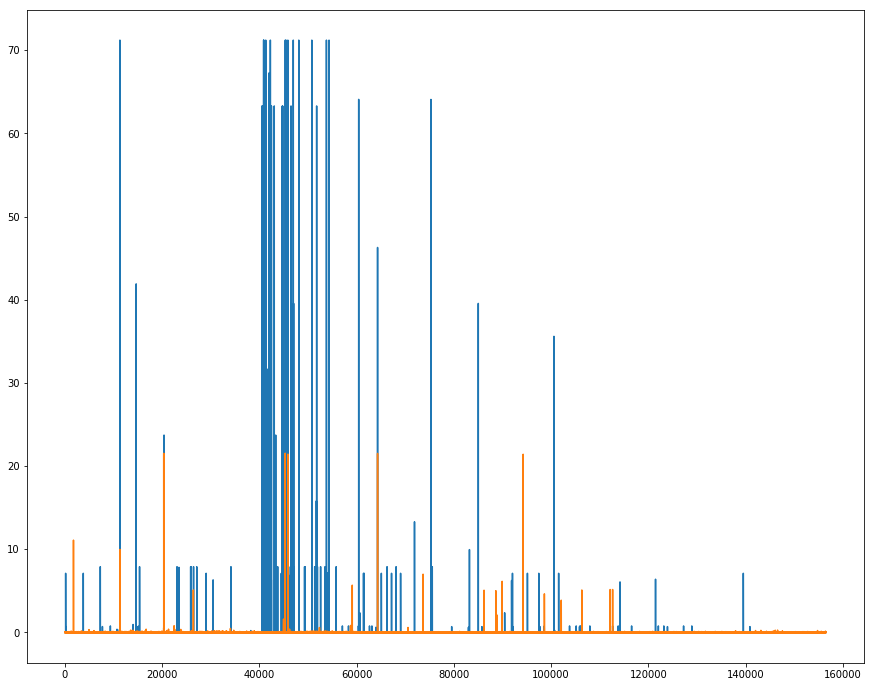

In [133]:
plt.plot(np.arange(X.shape[0]), Y)
plt.plot(np.arange(X.shape[0]), y_hat)

In [134]:
def MSE(yh, y):
     return np.square(yh - y).mean()
def MAE(yh, y):
    return np.abs(yh - y).mean()
def R_squared(yh, y):
    #-- R_square = 1 - (SS[reg]/SS[total])
    # 1 - (y-yh).dot(y-yh)/(y - y.mean()).dot(y - y.mean()) OR
    return (1 -(np.sum(np.square(y - yh))/np.sum(np.square(y - y.mean())))) 

print('MSE: %s'%(MSE(y_hat, Y)))
print('MAE: %s'%(MAE(y_hat, Y)))
print('R_squared = %s'%(R_squared(y_hat, Y)))

MSE: 0.9753482238854858
MAE: 0.04228606891494977
R_squared = 0.024651776114514745


#### From the above we can estimate Linear regression is a not mess for prediction meter prices. The R_squared value is extremely low at 2.5%/100%

Text(0.5, 1.0, 'Count of District_id')

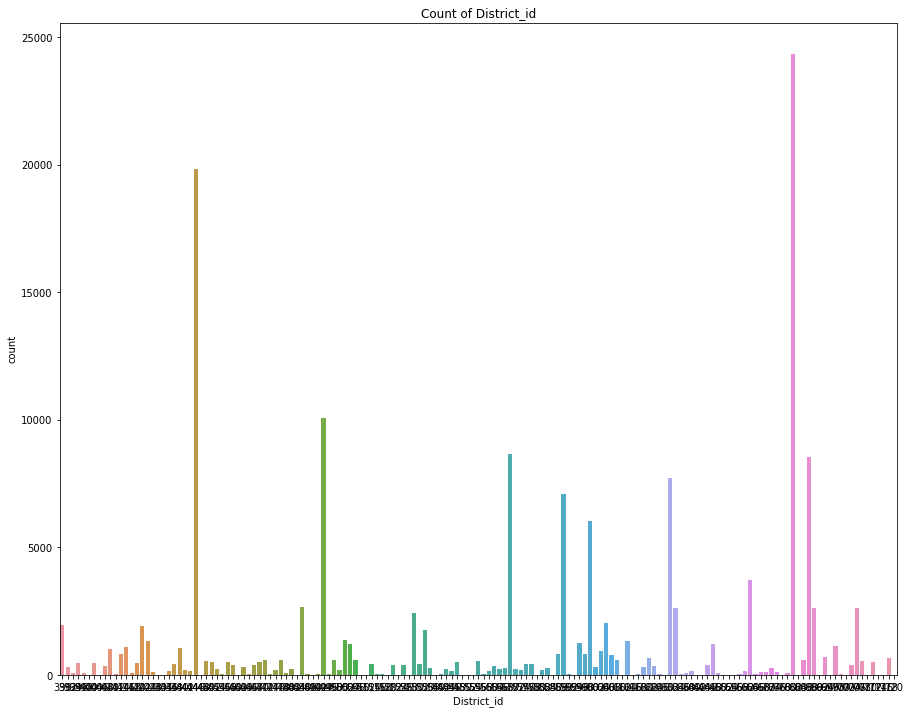

In [135]:
x = 'District_id'
sns.countplot(x = x, data = hosue_df)
plt.title('Count of %s'%x)

Text(0.5, 1.0, 'District_id count vs Bed Rooms')

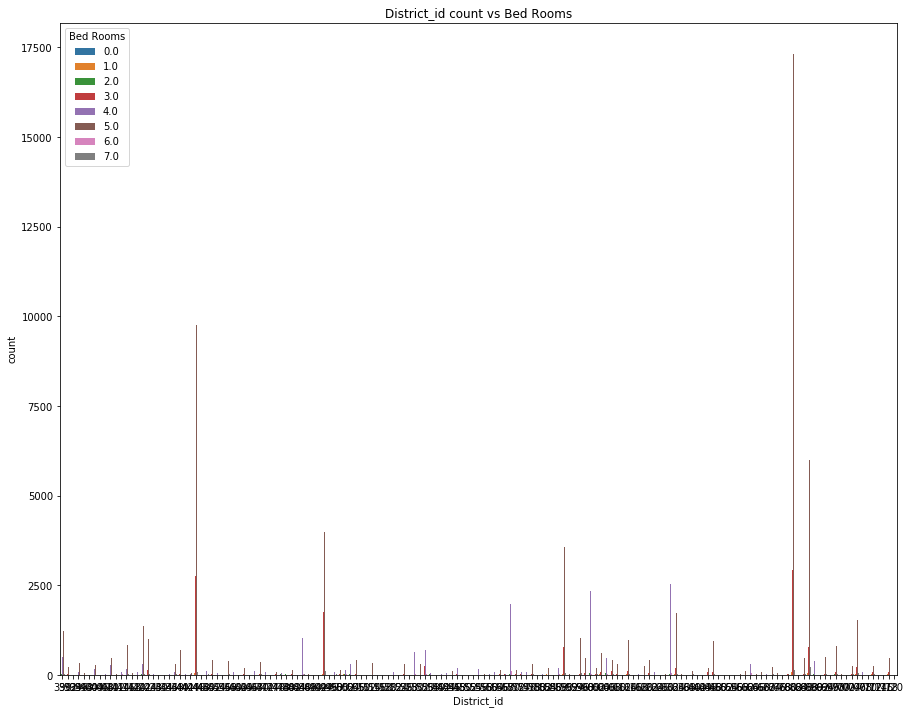

In [136]:
x = 'District_id'
y = 'Bed Rooms'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs With Images')

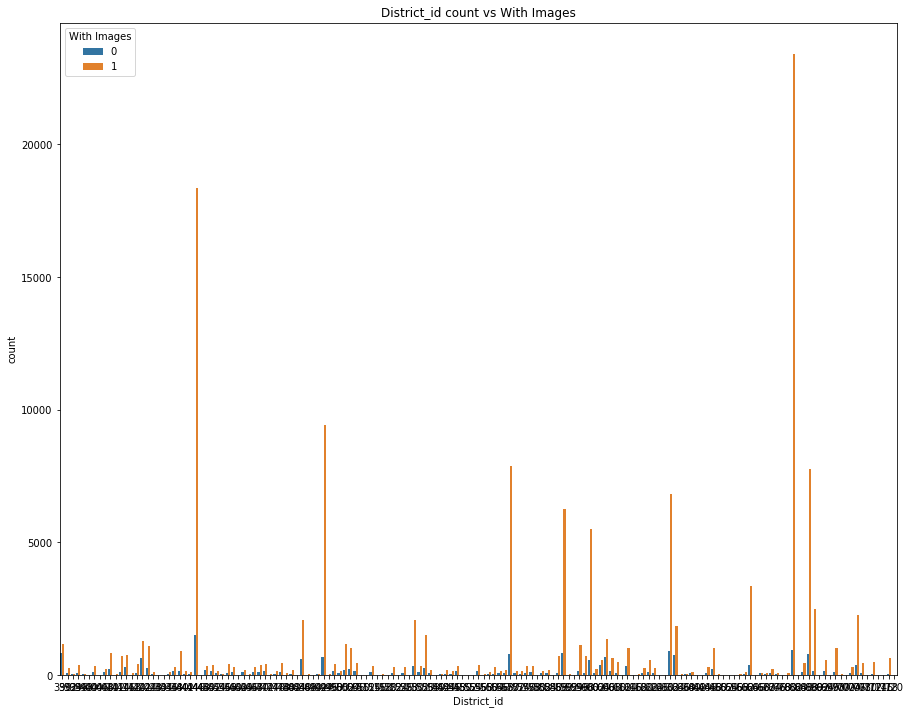

In [137]:
x = 'District_id'
y = 'With Images'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Living Rooms')

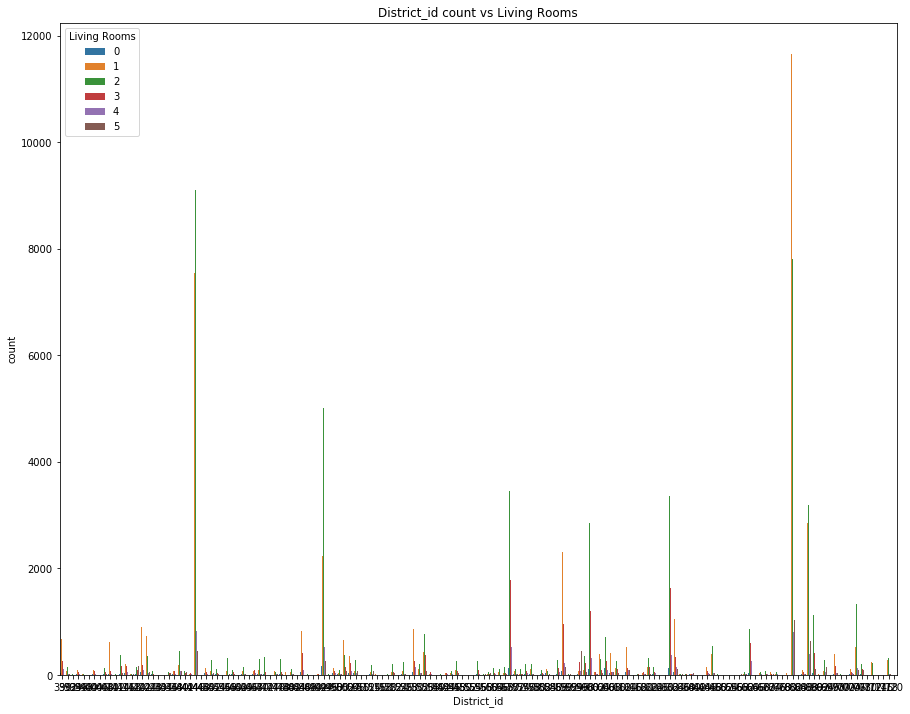

In [138]:
x = 'District_id'
y = 'Living Rooms'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Pool')

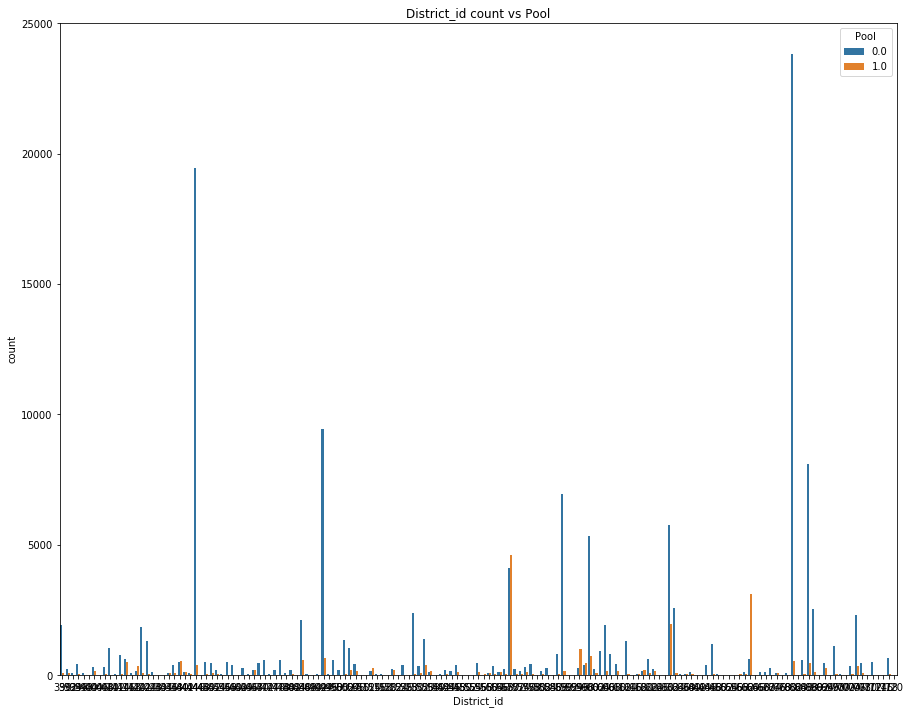

In [139]:
x = 'District_id'
y = 'Pool'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))


Text(0.5, 1.0, 'District_id count vs Furnished')

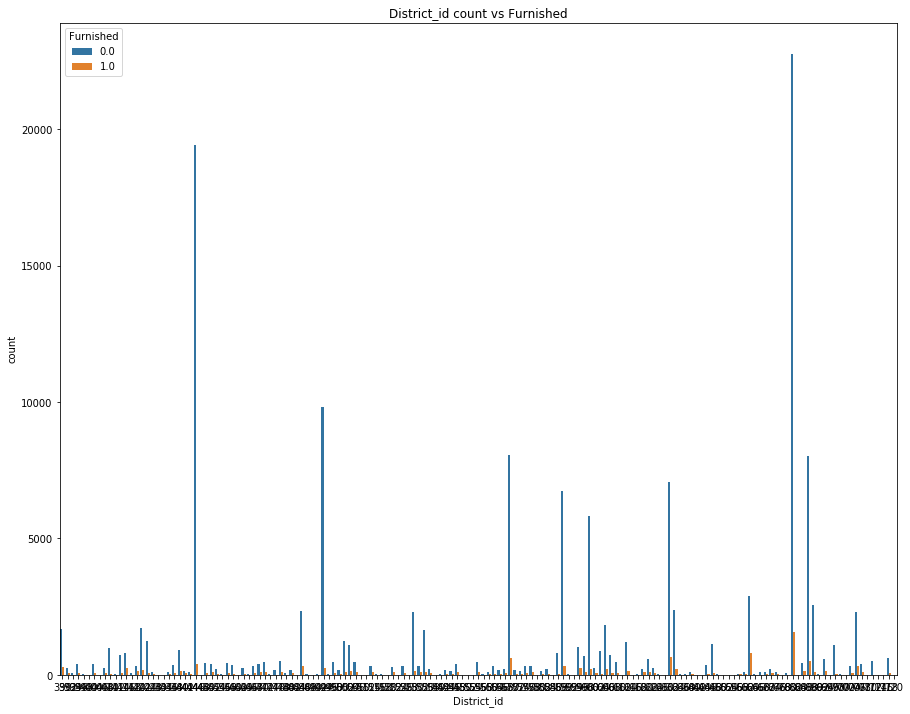

In [140]:
x = 'District_id'
y = 'Furnished'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))


Text(0.5, 1.0, 'District_id count vs Extra Unit')

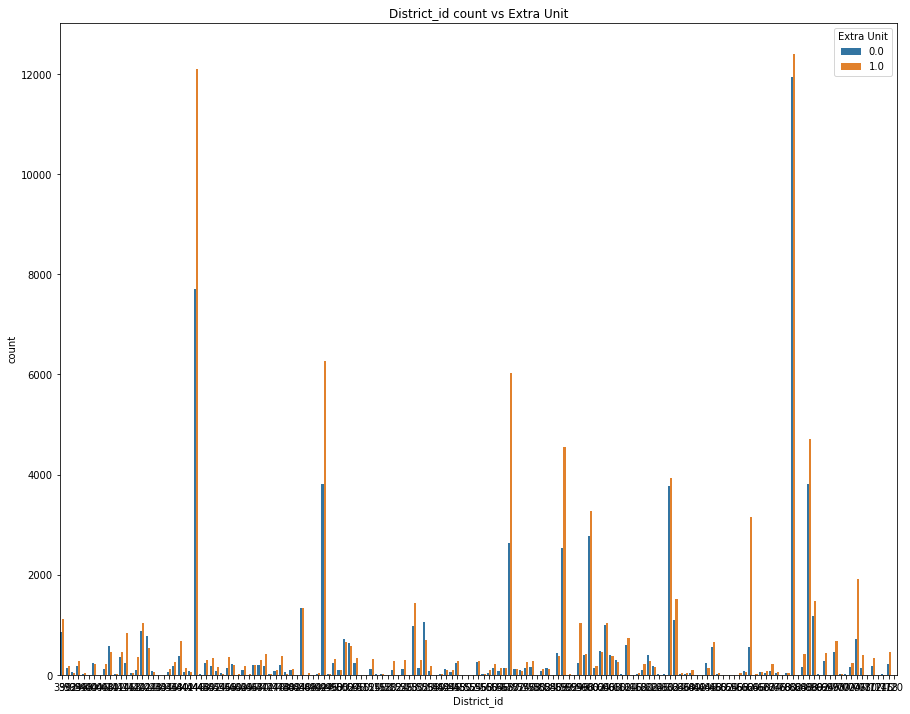

In [141]:
x = 'District_id'
y = 'Extra Unit'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Car Entrance')

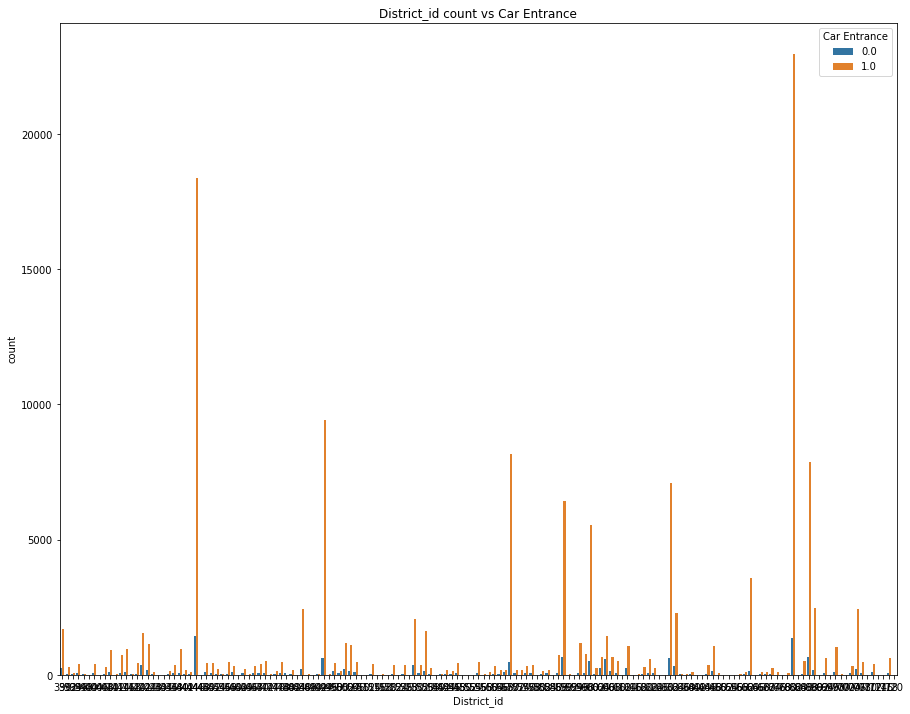

In [142]:
x = 'District_id'
y = 'Car Entrance'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Basement')

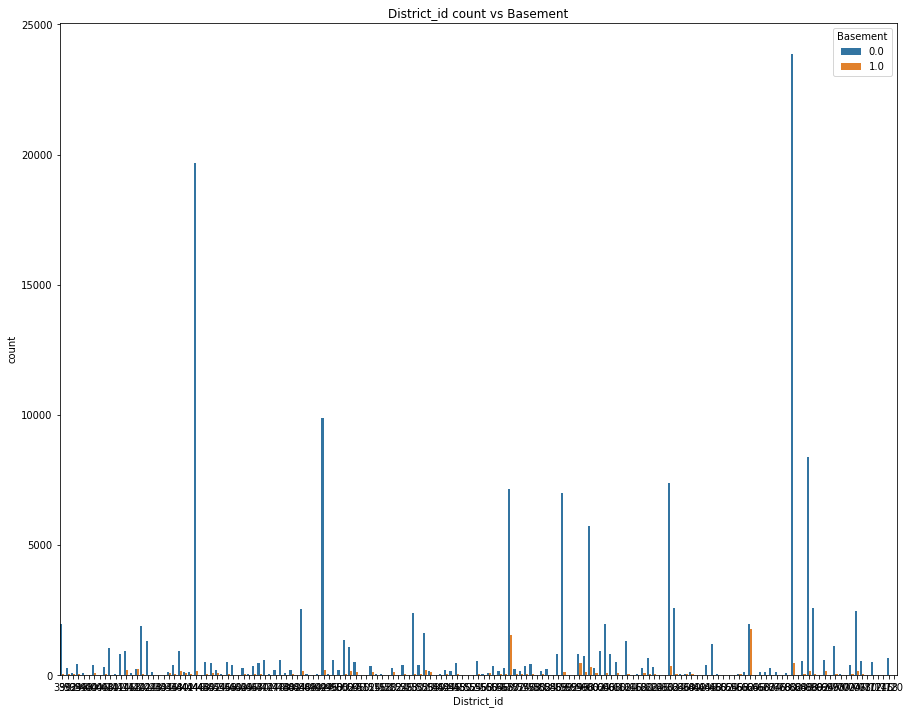

In [143]:
x = 'District_id'
y = 'Basement'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

Text(0.5, 1.0, 'District_id count vs Lift')

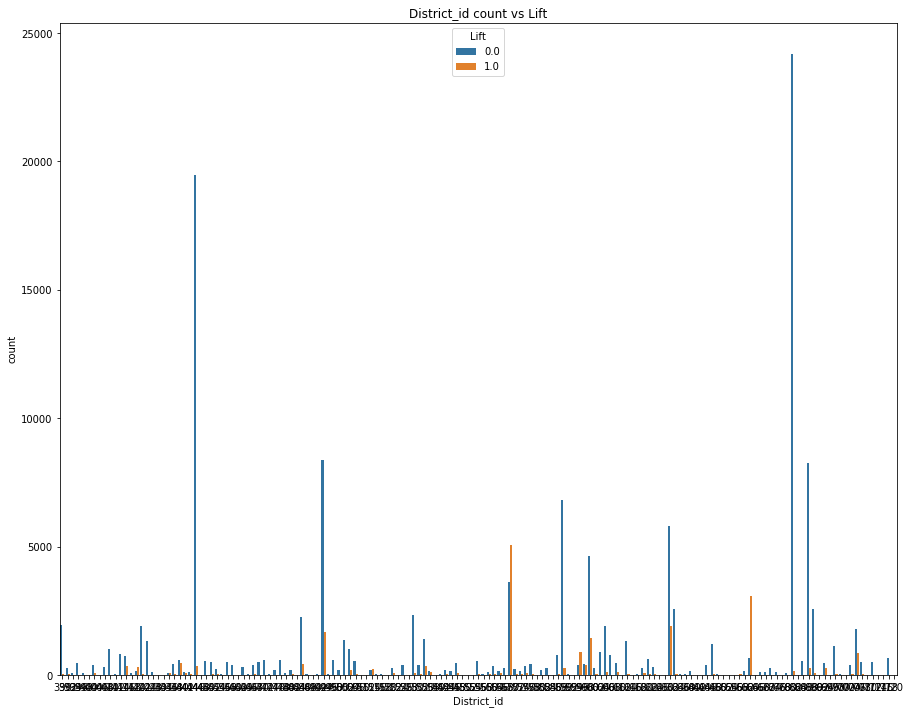

In [144]:
x = 'District_id'
y = 'Lift'
sns.countplot(x = x, data = hosue_df, hue = y)
plt.title('%s count vs %s'%(x, y))

# MOVING AVERAGE

In [146]:
#data exploration
color = ['red', 'green', 'brown', 'black', 'blue', 'indigo']
def moving_av(df, n):
  '''
  :params
    :df: feature, can be price, area or any numerical value 
    :n: period we want to check price
  '''
  return pd.DataFrame({str(n)+'_day_average': df.rolling(n).mean()})

def expmoving_av(df, n):
  '''
  :params
    :df: feature, can be price, area or any numerical value 
    :n: period we want to check price
  '''
  return pd.DataFrame({'MA_'+str(n): df.ewm(n).mean()})

def plot_ma(df, n):
  ma_perd = moving_av(df.Price, n)
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex= True)
  ax1.plot(df.index, df.Price, lw = .5, color = color[1], label = 'Price')
  ax1.legend()
  ax2.plot(df.index, ma_perd, lw = .5, color = color[2], label = str(n)+'day_MA')
  ax2.legend()
  plt.title(str(n)+' day_Moving Average')
  
def plot_ma_all(df, n):
  ma = []
  for ii in n:
    ma.append(moving_av(df.Price, ii))
  fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, sharex= True)
  ax1.plot(df.index, df.Price, lw = .5, color = color[1], label = 'Price')
  ax1.legend()
  ax1.set_title('Price')
  ax2.plot(df.index, ma[0], lw = .5, color = color[2], label = str(30)+'day_MA')
  ax2.legend()
  ax2.set_title(str(30)+' day_Moving Average')
  ax3.plot(df.index, ma[1], lw = .5, color = color[2], label = str(60)+'day_MA')
  ax3.legend()
  ax3.set_title(str(60)+' day_Moving Average')
  ax4.plot(df.index, ma[2], lw = .5, color = color[2], label = str(120)+'day_MA')
  ax4.legend()
  ax4.set_title(str(120)+' day_Moving Average')
  ax5.plot(df.index, ma[3], lw = .5, color = color[2], label = str(240)+'day_MA')
  ax5.legend()
  ax5.set_title(str(240)+' day_Moving Average')
  ax6.plot(df.index, ma[4], lw = .5, color = color[2], label = str(360)+'day_MA')
  ax6.legend()
  ax6.set_title(str(365)+' day_Moving Average')
  ax7.plot(df.index, ma[5], lw = .5, color = color[2], label = str(730)+'day_MA')
  ax7.legend()
  ax7.set_title(str(730)+' day_Moving Average')
  

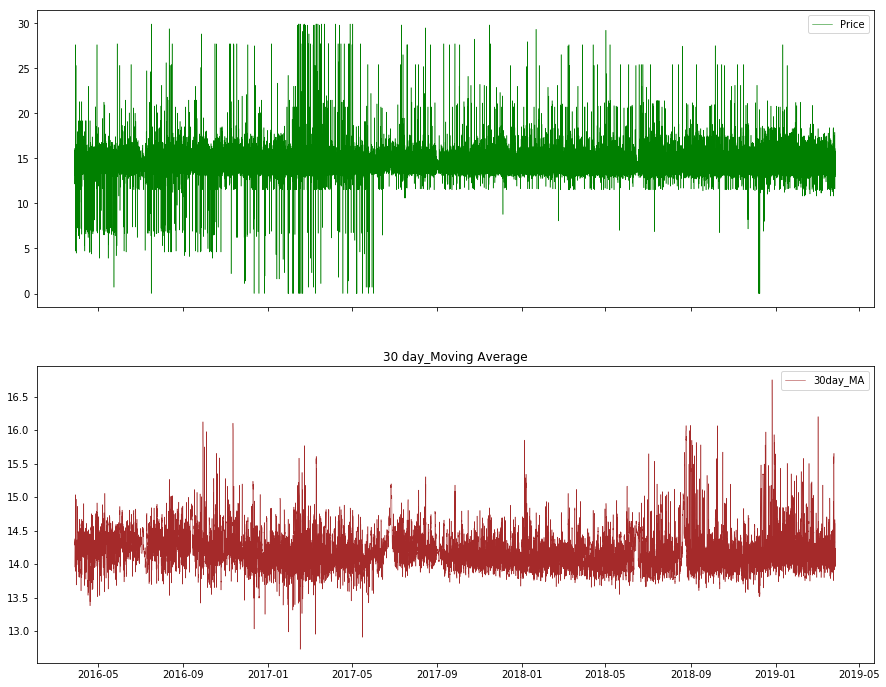

In [147]:
plot_ma(log_data, 30)

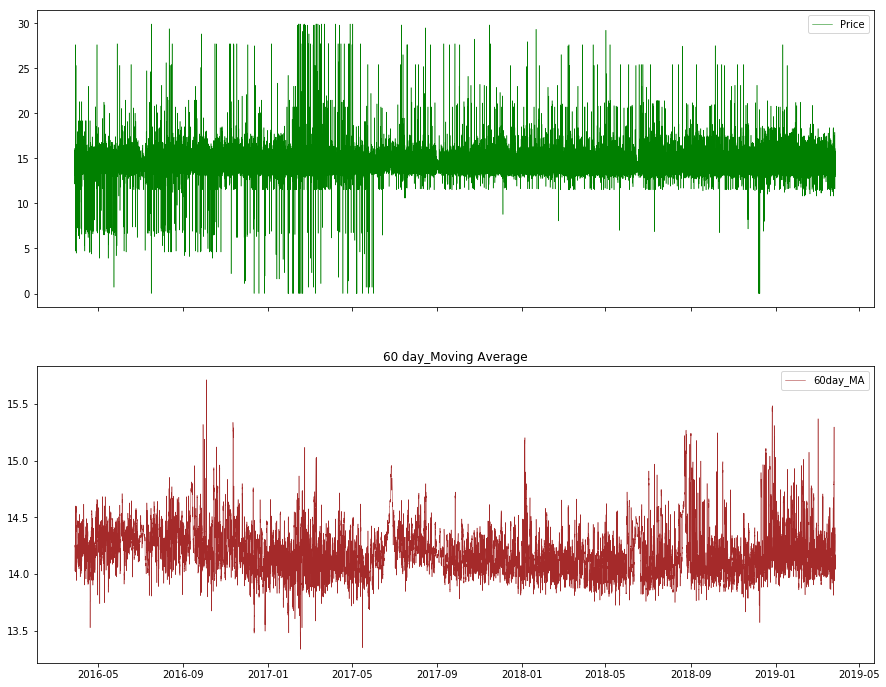

In [148]:
plot_ma(log_data, 60)

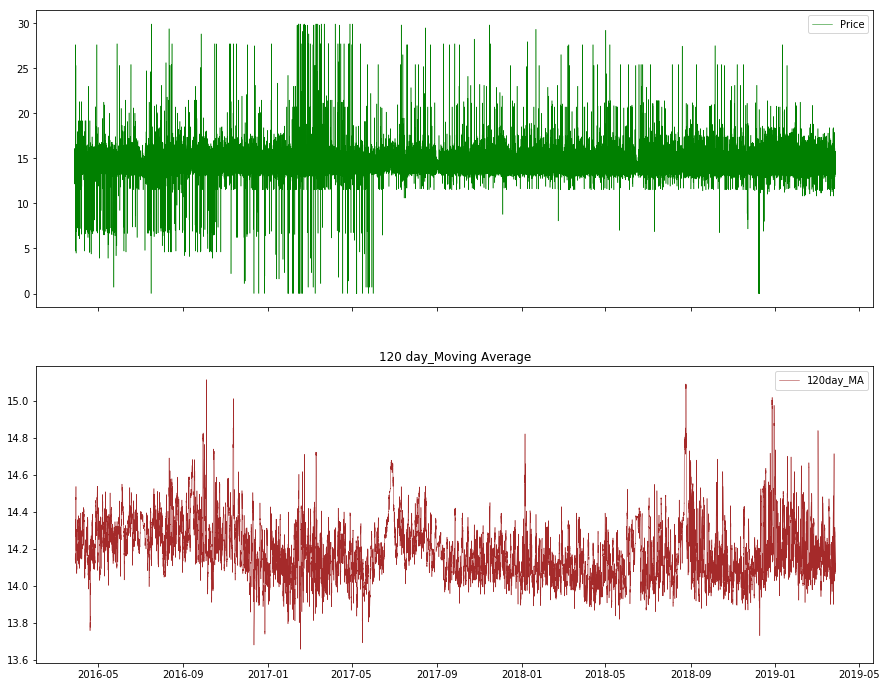

In [149]:
plot_ma(log_data, 120)

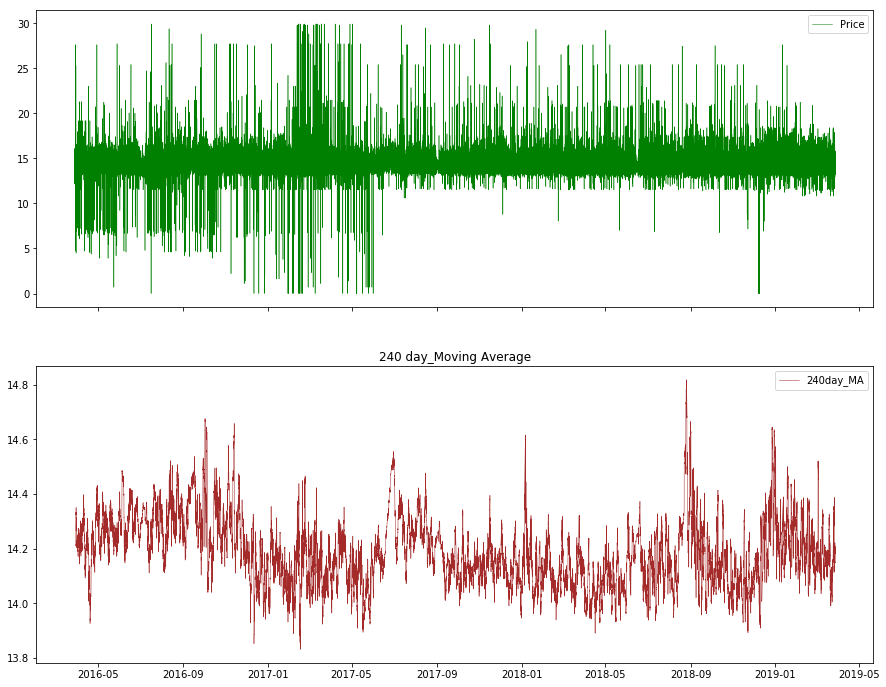

In [150]:
plot_ma(log_data, 240)

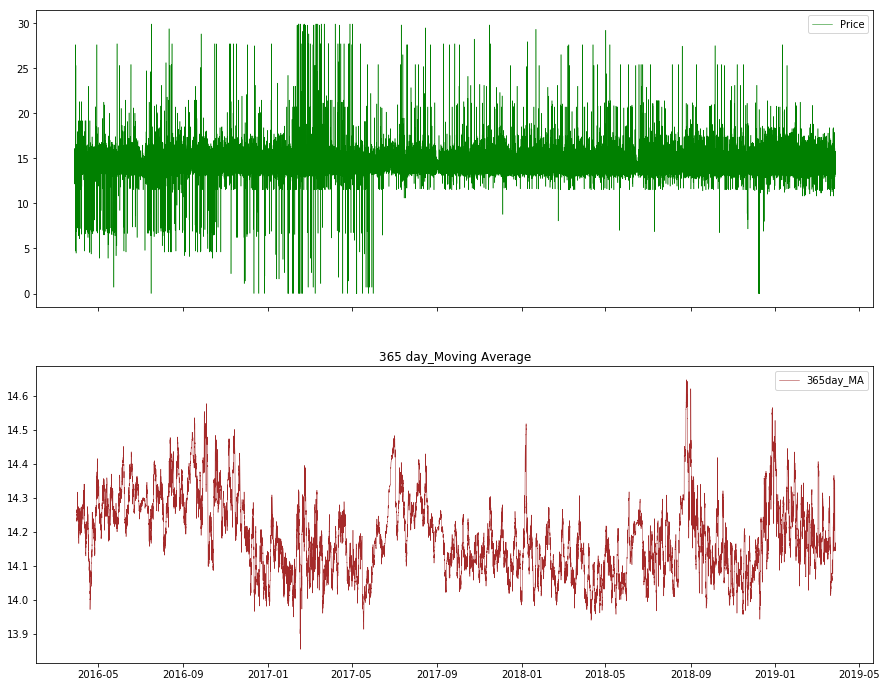

In [151]:
plot_ma(log_data, 365)

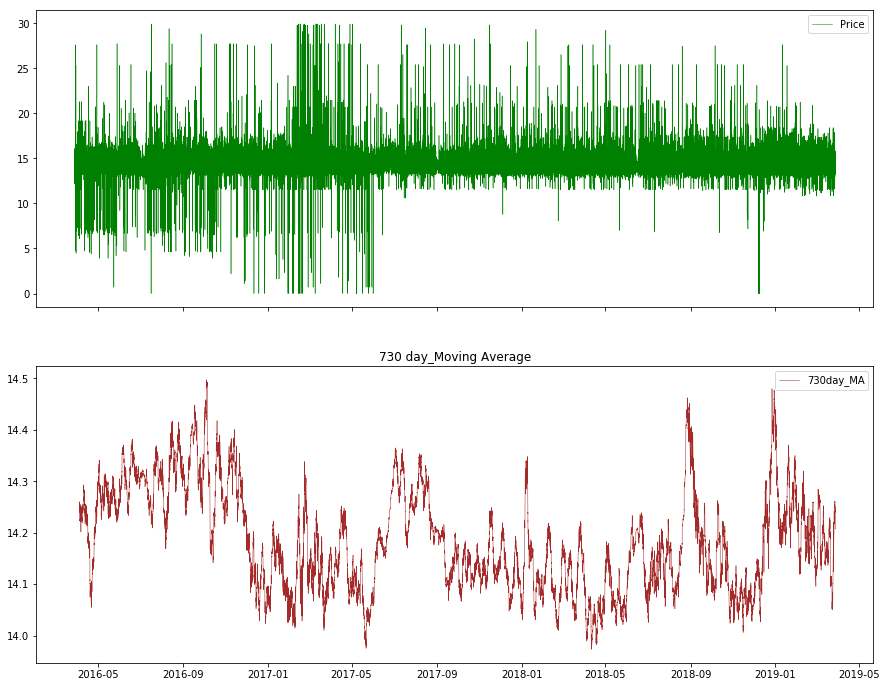

In [152]:
plot_ma(log_data, 730)

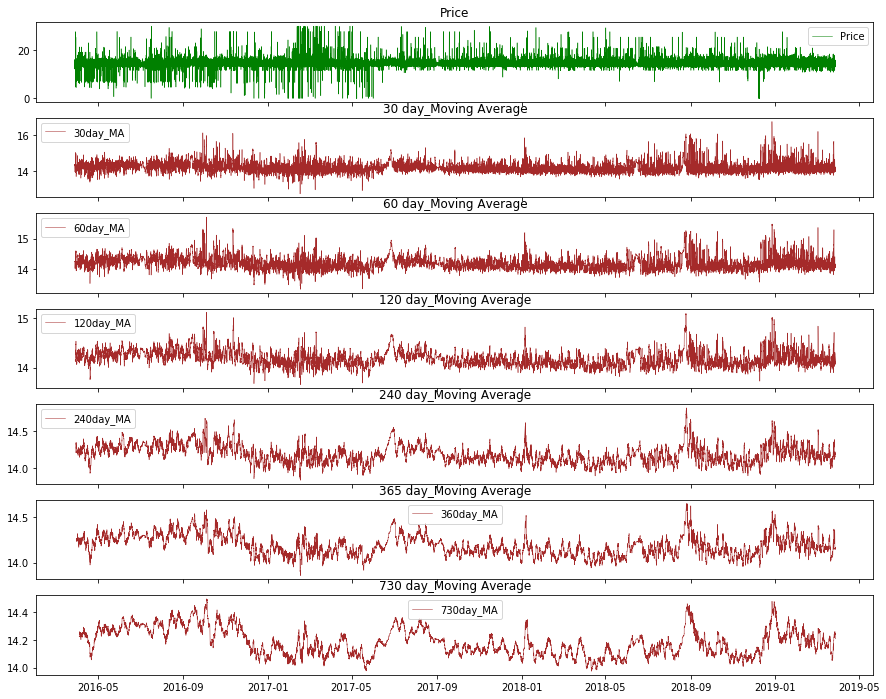

In [153]:
plot_ma_all(log_data, [30, 60, 120, 240, 365, 730])

# MOVING AVERAGE COVERGENCE DIVERGENCE

In [154]:
def ema(df, n):
  '''
  :params
    :df: <pandas dataframe> feature, can be price, area or any numerical value 
    :n: <integer> period we want to check price
  '''
  return df.ewm(n).mean()

def MACD(price, n_fast, n_slow, signal):
    '''
    :Arguments:
      :n_fast: <integer> representing fast exponential
              moving average
              
      :n_slow: <integer> representing slow exponential
              moving average
              
      :signal: Signal line
      
    :Return:
      MACD: fast, slow and signal.
    '''
    
    n_fast = n_fast
    n_slow = n_slow
    signal = signal
    #defin MACD
    macd = ema(price, n_fast) - ema(price, n_slow)
    #MACD signal
    macd_signal = ema(macd, signal)
    #MACD histo
    macd_histo_ = macd - macd_signal
    return pd.DataFrame({'MACD': macd, 'MACD_HIST': macd_histo_,
                         'MACD_SIGNAL': macd_signal})

FAST = 12
SLOW = 26
SIGNAL = 9
macd = MACD(log_data.Price, FAST, SLOW, SIGNAL)

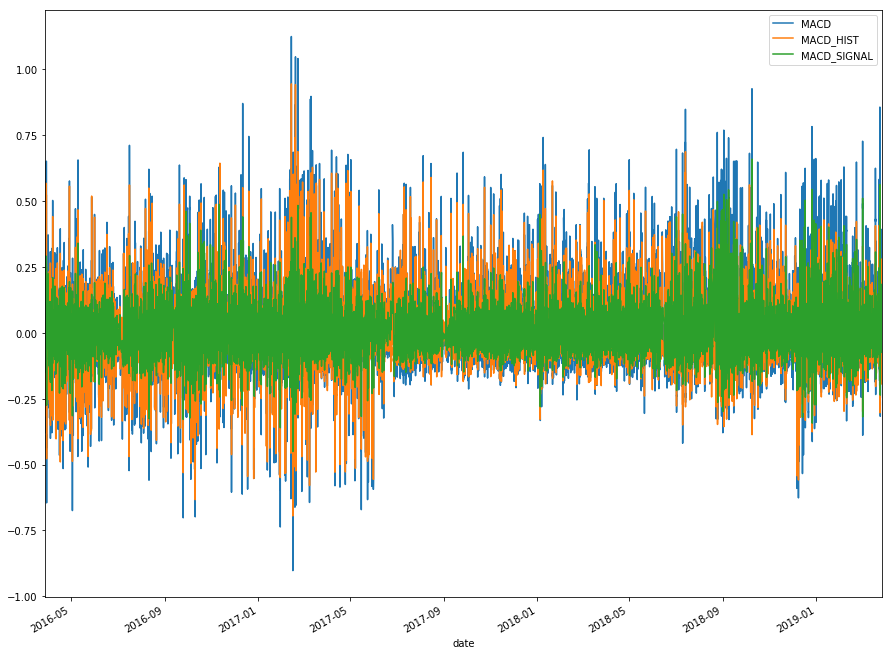

In [155]:
macd.plot()

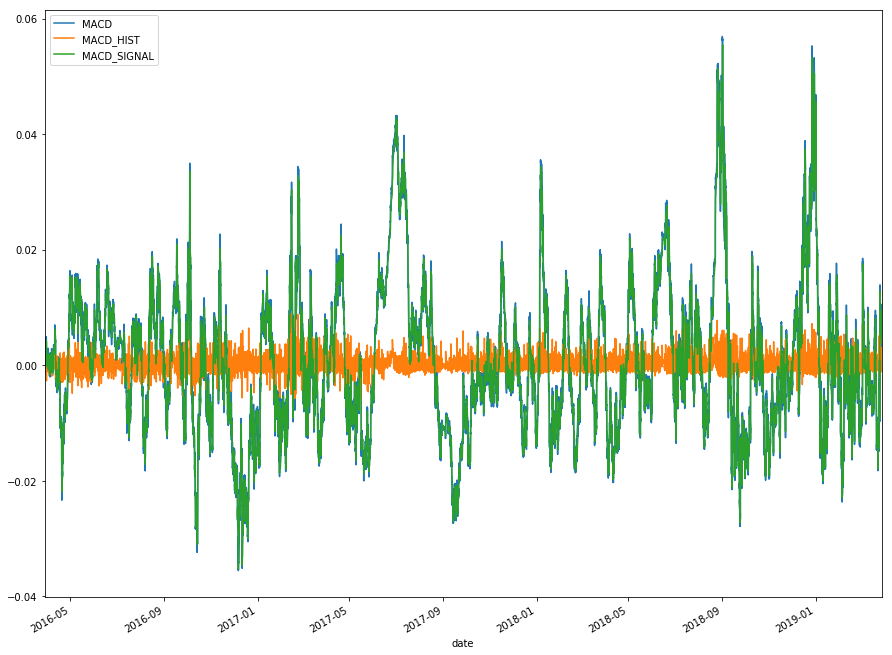

In [156]:
FAST = 1000
SLOW = 1530
SIGNAL = 9
macd = MACD(log_data.Price, FAST, SLOW, SIGNAL)
macd.plot()

# Feature Importance

Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=11, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best Score: -0.0016384267295714322
Best params: {'max_depth': 4, 'min_child_weight': 11, 'n_estimators': 30}


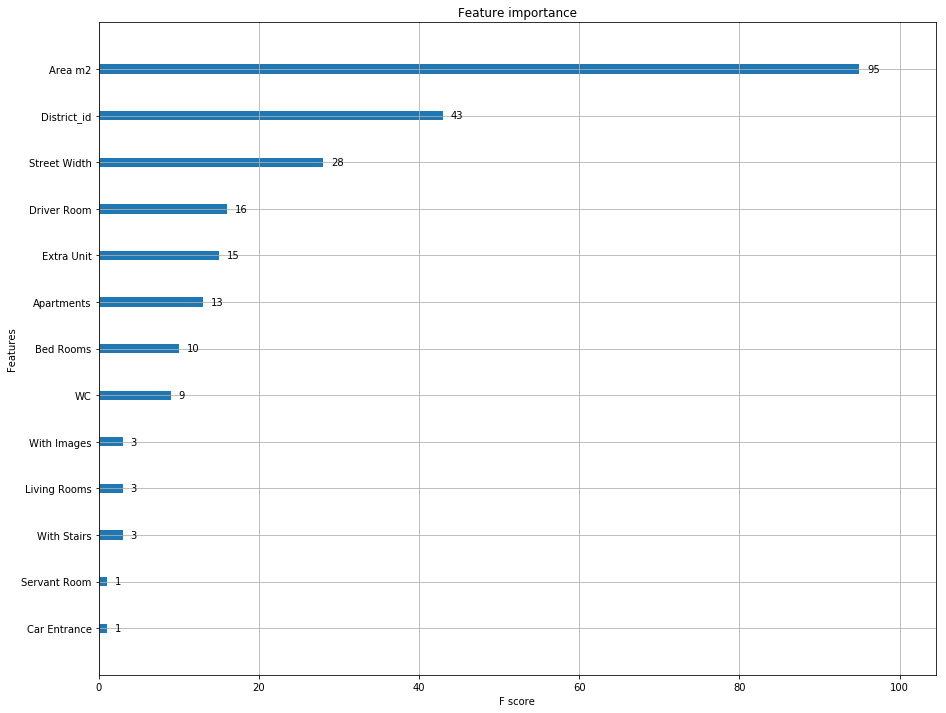

In [157]:
from scipy import stats
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#plot feature importance
#def plot_features(model):
#  figsize = [20, 16]
#  #fig, ax = plt.subplots(1, 1, figsize = figsize)
#  return plot_importance(model)


def train_test(df, split = None, test_siz = None):
  if not split:
    return df.Price.values, df.drop(['Price'], axis = 1)
  else:
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Price'], axis = 1), df.Price.values, test_size = test_siz)
#    X_train, X_test = standize_it(X_train), standize_it(X_test)
    return X_train, X_test, Y_train, Y_test

df_y, df_X = train_test(df_standard)


def Grid_Search_CV_RFR(X_train, y_train):
  #model
  model = XGBRegressor()
  #parameters
  param_grid = { 
          "n_estimators" : [10,20,30, 50],
          'max_depth': [4, 5, 6],
          'min_child_weight': [11],
          }

  grid = GridSearchCV(model, param_grid,
                      cv=KFold(n_splits=10, shuffle=True),
                      n_jobs=-1)

  grid.fit(df_X, df_y)
  print('Best Estimator: %s'%grid.best_estimator_)
  print('Best Score: %s'%grid.best_score_)
  print('Best params: %s'%grid.best_params_)
  return grid.best_estimator_, grid.best_score_ , grid.best_params_

estimator, score_, params_ = Grid_Search_CV_RFR(df_X, df_y)

#plot importance
plot_importance(estimator)


In [161]:
param = {'max_depth': 4, 'min_child_weight': 11, 'n_estimators': 30}
model = XGBRegressor(params_ = param)
model.fit(df_X, df_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear',
       params_={'max_depth': 4, 'min_child_weight': 11, 'n_estimators': 30},
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

## Extract Important features for regression

In [270]:
from collections import Counter
def extractFeatures(model, k_features, fscore = None):
    features = Counter(estimator.get_booster().get_score()) 
    features = features.most_common(k_features)
    features = [x[0] for x in features if x[1] >= fscore]
    return features

In [753]:
features = extractFeatures(estimator, 20, 1); features

['Area m2',
 'District_id',
 'Street Width',
 'Driver Room',
 'Extra Unit',
 'Apartments',
 'Bed Rooms',
 'WC',
 'With Stairs',
 'Living Rooms',
 'With Images',
 'Car Entrance',
 'Servant Room']

In [1187]:
features = ['Area m2',
             'District_id',
             'Street Width',
             'Driver Room',
             'Extra Unit',
             'Apartments',
             'Bed Rooms',
             'WC',
             'With Stairs',
             'Living Rooms',
             'Servant Room']
X = df_standard_no_out[features]
X = np.c_[np.ones((X.shape[0], 1)), X]    
Y = df_standard_no_out[['Price']].values


In [787]:
Y.shape

(53857, 1)

In [788]:
lm = Regression()

In [789]:
yhat = lm.fit_predict(X, Y); yhat

array([[-0.63252894],
       [ 0.61207865],
       [-0.46636347],
       ...,
       [-1.2921926 ],
       [-0.59979472],
       [-0.42950184]])

In [790]:
Y.shape

(53857, 1)

In [791]:
lm.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.7247154702854182
****************************************
MSE: 0.5252125128710149
****************************************
MAE: 0.5387420143781421
****************************************
R_squared = 0.4747874871289849
****************************************


No handles with labels found to put in legend.


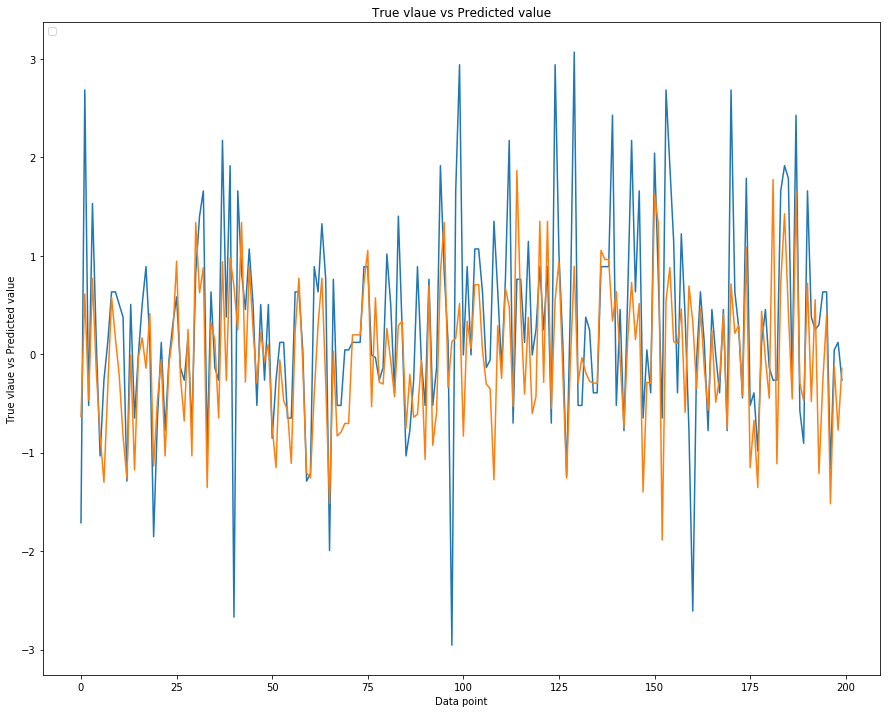

In [792]:
lm.plot(X[:200], Y[:200], yhat[:200])

In [793]:
iterations = 1000
gd = GradientDescent()
beta,cost_rec,theta_rec, yhat, stopping = gd.GD(X, Y, beta = np.zeros(X.shape[1]).reshape(-1, 1), alpha = 0.1, iterations = iterations, early_stopping=True)


****************************************
0 iteratiion, cost = 1260499161.2856932
****************************************
1 iteratiion, cost = 1130237280.9350493
****************************************
2 iteratiion, cost = 1039502327.0293404
****************************************
3 iteratiion, cost = 975281676.9828017
****************************************
4 iteratiion, cost = 929048321.9330262
****************************************
5 iteratiion, cost = 895170049.2331133
****************************************
6 iteratiion, cost = 869893771.6341434
****************************************
7 iteratiion, cost = 850694113.4824167
****************************************
8 iteratiion, cost = 835853539.6522752
****************************************
9 iteratiion, cost = 824190254.3393011
****************************************
10 iteratiion, cost = 814880815.0608718
****************************************
11 iteratiion, cost = 807343741.2935181
***********************************

****************************************
196 iteratiion, cost = 761709525.0030997
****************************************
197 iteratiion, cost = 761709524.8172402
****************************************
198 iteratiion, cost = 761709524.6469082
****************************************
199 iteratiion, cost = 761709524.4908055
****************************************
200 iteratiion, cost = 761709524.3477427
****************************************
201 iteratiion, cost = 761709524.2166296
****************************************
202 iteratiion, cost = 761709524.0964674
****************************************
203 iteratiion, cost = 761709523.986341
****************************************
204 iteratiion, cost = 761709523.8854113
****************************************
205 iteratiion, cost = 761709523.7929101
****************************************
206 iteratiion, cost = 761709523.708133
****************************************
207 iteratiion, cost = 761709523.6304344
******************

In [794]:
gd.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.7247154702854193
****************************************
MSE: 0.5252125128710164
****************************************
MAE: 0.5387420122420591
****************************************
R_squared = 0.47478748712898333
****************************************


No handles with labels found to put in legend.


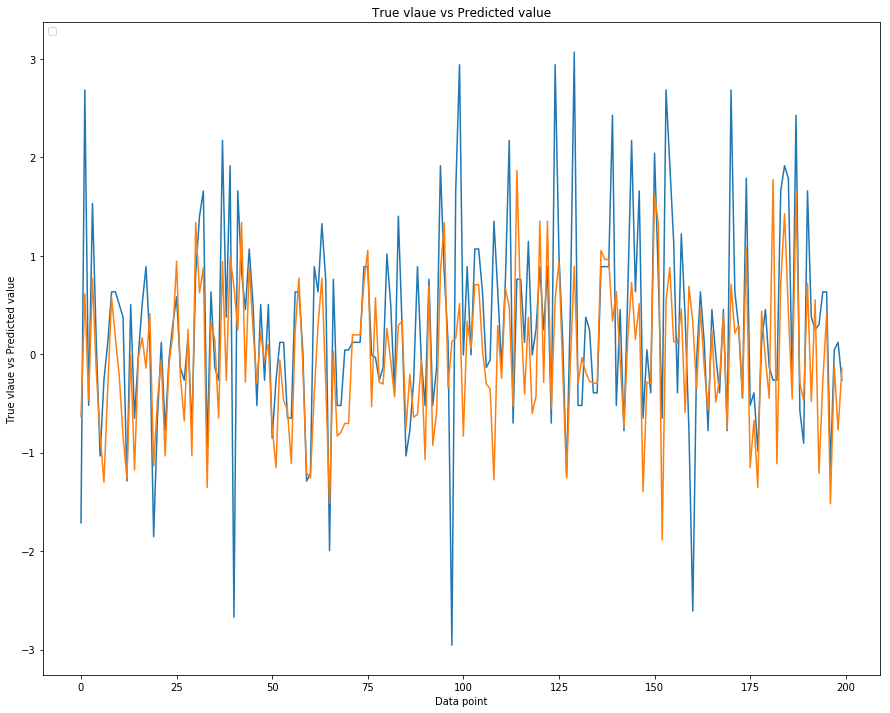

In [795]:
gd.plot(X[:200], Y[:200], yhat[:200])

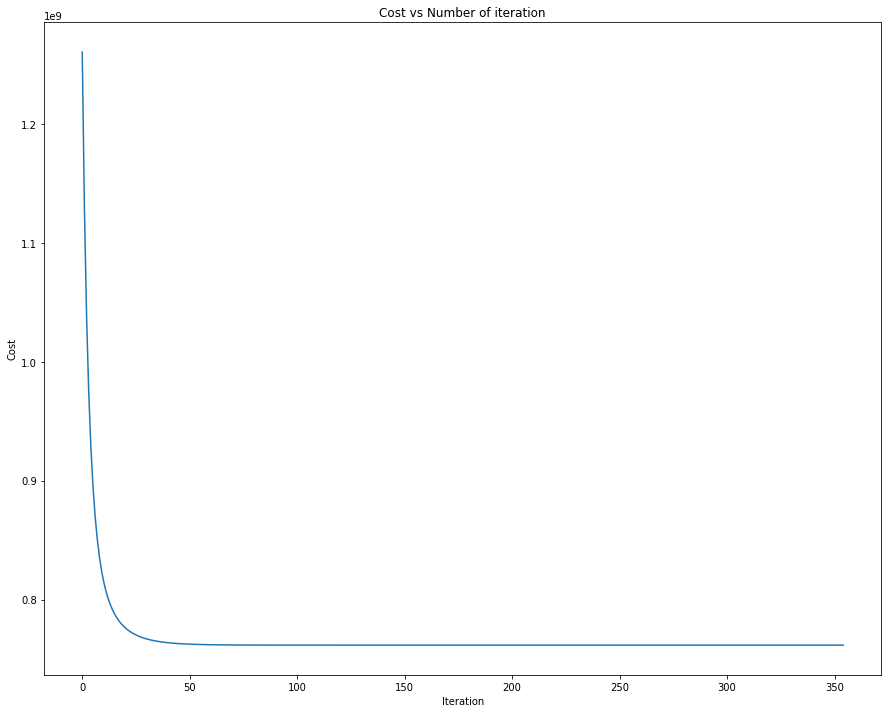

In [796]:
gd.plot_cost(cost_rec, stopping)

In [797]:
#--stochastic gradient descent
stgrad = StochasticGradientDescent()
beta,cost_rec, yhat, stopping = stgrad.StochGD(X, Y, beta = np.zeros(X.shape[1]).reshape(-1, 1), alpha = 0.8, iterations = iterations, early_stopping=True)

****************************************
0 iteratiion, cost = 87291729.78839032
****************************************
1 iteratiion, cost = 33717555.489363104
****************************************
2 iteratiion, cost = 199338971.0442179
****************************************
3 iteratiion, cost = 438028274.88475096
****************************************
4 iteratiion, cost = 383080628.198286
****************************************
5 iteratiion, cost = 438114015.27562934
****************************************
6 iteratiion, cost = 152764172.56298646
****************************************
7 iteratiion, cost = 199906975.93015975
****************************************
8 iteratiion, cost = 644383589.8707592
****************************************
9 iteratiion, cost = 62368575.82713277
****************************************
10 iteratiion, cost = 151546416.87553462
****************************************
11 iteratiion, cost = 254784283.99446842
********************************

****************************************
108 iteratiion, cost = 257205732.26327237
****************************************
109 iteratiion, cost = 230919.03373833012
****************************************
110 iteratiion, cost = 59994124.13373661
****************************************
111 iteratiion, cost = 601437010.4612463
****************************************
112 iteratiion, cost = 420099783.4942576
****************************************
113 iteratiion, cost = 677566322.3859288
****************************************
114 iteratiion, cost = 660272347.8133544
****************************************
115 iteratiion, cost = 415249243.91637075
****************************************
116 iteratiion, cost = 625707.8483585289
****************************************
117 iteratiion, cost = 548409.363719253
****************************************
118 iteratiion, cost = 535305191.1224533
****************************************
119 iteratiion, cost = 211243467.04146332
*************

****************************************
221 iteratiion, cost = 551368883.9049429
****************************************
222 iteratiion, cost = 333668193.5723972
****************************************
223 iteratiion, cost = 90541243.09670983
****************************************
224 iteratiion, cost = 327208242.4781964
****************************************
225 iteratiion, cost = 19180354.666617908
****************************************
226 iteratiion, cost = 73410250.0011048
****************************************
227 iteratiion, cost = 726304484.3777761
****************************************
228 iteratiion, cost = 358486745.78062624
****************************************
229 iteratiion, cost = 41558338.24683746
****************************************
230 iteratiion, cost = 203799993.16755274
****************************************
231 iteratiion, cost = 22340714.360831525
****************************************
232 iteratiion, cost = 400105902.9095719
*************

****************************************
342 iteratiion, cost = 709798561.3476678
****************************************
343 iteratiion, cost = 639053860.5057894
****************************************
344 iteratiion, cost = 47474644.899066456
****************************************
345 iteratiion, cost = 40588224.09514732
****************************************
346 iteratiion, cost = 88892134.15039295
****************************************
347 iteratiion, cost = 299219477.67661643
****************************************
348 iteratiion, cost = 610737151.5785359
****************************************
349 iteratiion, cost = 56330490.56572114
****************************************
350 iteratiion, cost = 39212356.22546976
****************************************
351 iteratiion, cost = 378380202.0624577
****************************************
352 iteratiion, cost = 25195917.523388714
****************************************
353 iteratiion, cost = 374908027.18138725
************

****************************************
457 iteratiion, cost = 281414766.4791912
****************************************
458 iteratiion, cost = 24912458.156099636
****************************************
459 iteratiion, cost = 39357864.69837218
****************************************
460 iteratiion, cost = 600409905.4882709
****************************************
461 iteratiion, cost = 380818886.6302536
****************************************
462 iteratiion, cost = 41013495.51257227
****************************************
463 iteratiion, cost = 432250317.4417682
****************************************
464 iteratiion, cost = 26936511.776295774
****************************************
465 iteratiion, cost = 237197871.10700375
****************************************
466 iteratiion, cost = 672577567.5841662
****************************************
467 iteratiion, cost = 234638768.84142902
****************************************
468 iteratiion, cost = 524730990.3663623
************

****************************************
575 iteratiion, cost = 647172811.2065525
****************************************
576 iteratiion, cost = 364042812.57018137
****************************************
577 iteratiion, cost = 139209206.1339873
****************************************
578 iteratiion, cost = 241575846.37323093
****************************************
579 iteratiion, cost = 426259313.6456027
****************************************
580 iteratiion, cost = 597228668.8372043
****************************************
581 iteratiion, cost = 216020497.34024367
****************************************
582 iteratiion, cost = 600313604.4512041
****************************************
583 iteratiion, cost = 181655518.36557877
****************************************
584 iteratiion, cost = 652820866.1833119
****************************************
585 iteratiion, cost = 6742374.974366825
****************************************
586 iteratiion, cost = 55903668.17158773
************

****************************************
694 iteratiion, cost = 48514544.44411197
****************************************
695 iteratiion, cost = 163402530.39986995
****************************************
696 iteratiion, cost = 669154064.7586491
****************************************
697 iteratiion, cost = 103392525.23492496
****************************************
698 iteratiion, cost = 4339351.41020816
****************************************
699 iteratiion, cost = 29699333.340525907
****************************************
700 iteratiion, cost = 112208565.76662797
****************************************
701 iteratiion, cost = 680747635.7424237
****************************************
702 iteratiion, cost = 61355716.83238804
****************************************
703 iteratiion, cost = 205235631.111046
****************************************
704 iteratiion, cost = 152480248.5379887
****************************************
705 iteratiion, cost = 95889840.32459095
**************

****************************************
810 iteratiion, cost = 491994427.01234764
****************************************
811 iteratiion, cost = 17048210.73900598
****************************************
812 iteratiion, cost = 744116205.3959266
****************************************
813 iteratiion, cost = 591958535.5208435
****************************************
814 iteratiion, cost = 159809998.55895054
****************************************
815 iteratiion, cost = 27080904.31386771
****************************************
816 iteratiion, cost = 426361806.4913641
****************************************
817 iteratiion, cost = 20077082.498899207
****************************************
818 iteratiion, cost = 80455714.68012688
****************************************
819 iteratiion, cost = 288056025.28701705
****************************************
820 iteratiion, cost = 22716756.322610285
****************************************
821 iteratiion, cost = 364227858.639468
************

****************************************
922 iteratiion, cost = 179379892.41022557
****************************************
923 iteratiion, cost = 119290072.44257419
****************************************
924 iteratiion, cost = 622546123.094062
****************************************
925 iteratiion, cost = 167202862.80284542
****************************************
926 iteratiion, cost = 47750375.958362244
****************************************
927 iteratiion, cost = 8278716.555767853
****************************************
928 iteratiion, cost = 15160985.789880032
****************************************
929 iteratiion, cost = 22876870.368125204
****************************************
930 iteratiion, cost = 526229489.68525064
****************************************
931 iteratiion, cost = 40363268.16298035
****************************************
932 iteratiion, cost = 257549455.56566548
****************************************
933 iteratiion, cost = 616289209.188448
**********

In [798]:
stgrad.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.7294968519351611
****************************************
MSE: 0.5321656569833103
****************************************
MAE: 0.546773752997218
****************************************
R_squared = 0.46783434301668947
****************************************


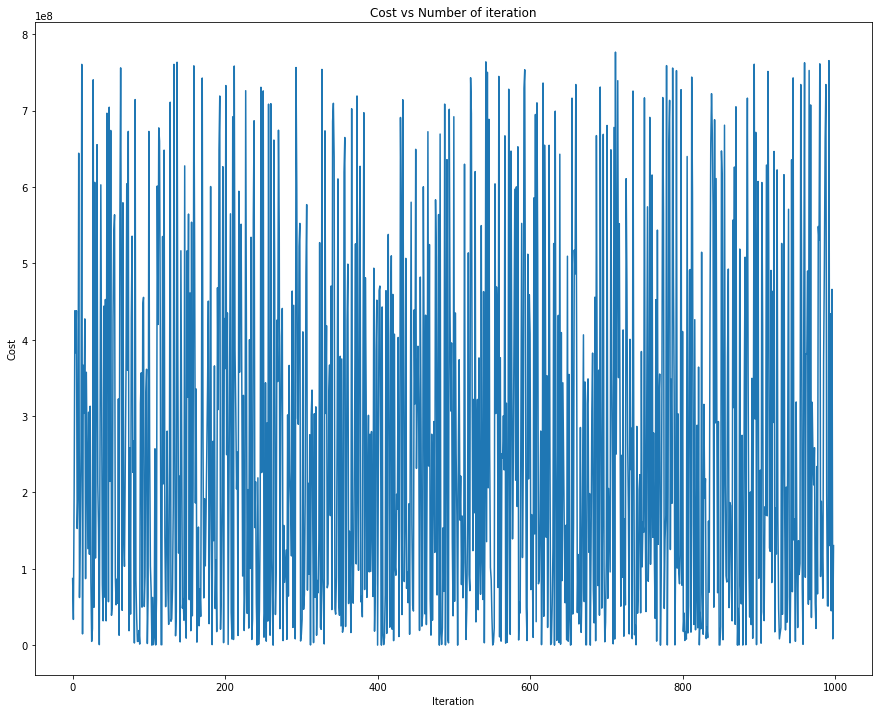

In [799]:
stgrad.plot_cost(cost_rec, stopping)

In [863]:
iterations = 1000
minibatch = MinibatchGradientDescent()
beta,cost_rec, yhat, stopping = minibatch.minbatchGD(X, Y, beta = np.zeros(X.shape[1]).reshape(-1, 1), alpha = 0.001, iterations = iterations, batch_size = 50, early_stopping=True)

****************************************
0 iteratiion, cost = 62499.87542781499
****************************************
1 iteratiion, cost = 49729.39701936987
****************************************
2 iteratiion, cost = 51626.10545490834
****************************************
3 iteratiion, cost = 47673.20688392001
****************************************
4 iteratiion, cost = 49132.48903537875
****************************************
5 iteratiion, cost = 46730.07408222114
****************************************
6 iteratiion, cost = 43829.7558350719
****************************************
7 iteratiion, cost = 45624.37459633659
****************************************
8 iteratiion, cost = 40567.667285955366
****************************************
9 iteratiion, cost = 40160.74584854141
****************************************
10 iteratiion, cost = 41013.42207060792
****************************************
11 iteratiion, cost = 39226.194896042296
*************************************

****************************************
108 iteratiion, cost = 30719.758277473236
****************************************
109 iteratiion, cost = 33668.86888875616
****************************************
110 iteratiion, cost = 30392.016093678216
****************************************
111 iteratiion, cost = 30475.918644852893
****************************************
112 iteratiion, cost = 34354.698547221415
****************************************
113 iteratiion, cost = 32435.085899863938
****************************************
114 iteratiion, cost = 30526.745312875526
****************************************
115 iteratiion, cost = 32024.86250914805
****************************************
116 iteratiion, cost = 34956.696912014195
****************************************
117 iteratiion, cost = 32342.077555231936
****************************************
118 iteratiion, cost = 32485.70994109659
****************************************
119 iteratiion, cost = 31132.14679115325
********

****************************************
217 iteratiion, cost = 32397.014061705315
****************************************
218 iteratiion, cost = 31947.099984601446
****************************************
219 iteratiion, cost = 33546.46159807645
****************************************
220 iteratiion, cost = 33134.0063554757
****************************************
221 iteratiion, cost = 31929.511494222785
****************************************
222 iteratiion, cost = 32246.2428858634
****************************************
223 iteratiion, cost = 30353.23243210759
****************************************
224 iteratiion, cost = 28690.44354590177
****************************************
225 iteratiion, cost = 31068.12410813479
****************************************
226 iteratiion, cost = 32415.32527314186
****************************************
227 iteratiion, cost = 32479.407379672317
****************************************
228 iteratiion, cost = 33191.16501656301
**************

****************************************
325 iteratiion, cost = 31201.854657402022
****************************************
326 iteratiion, cost = 34459.93243087434
****************************************
327 iteratiion, cost = 32290.06460186982
****************************************
328 iteratiion, cost = 31261.25722189373
****************************************
329 iteratiion, cost = 31853.701976567827
****************************************
330 iteratiion, cost = 34889.94431740485
****************************************
331 iteratiion, cost = 32965.987673938595
****************************************
332 iteratiion, cost = 31047.462373057573
****************************************
333 iteratiion, cost = 31874.250202670624
****************************************
334 iteratiion, cost = 33006.518141319575
****************************************
335 iteratiion, cost = 33252.55643750981
****************************************
336 iteratiion, cost = 34444.411536749074
*********

****************************************
458 iteratiion, cost = 31839.082943396083
****************************************
459 iteratiion, cost = 32989.401736310945
****************************************
460 iteratiion, cost = 29995.46496151975
****************************************
461 iteratiion, cost = 31636.32569245894
****************************************
462 iteratiion, cost = 34217.86101012804
****************************************
463 iteratiion, cost = 33928.34189367132
****************************************
464 iteratiion, cost = 33427.27221715246
****************************************
465 iteratiion, cost = 31417.43537547528
****************************************
466 iteratiion, cost = 32499.687508256793
****************************************
467 iteratiion, cost = 32936.031817038776
****************************************
468 iteratiion, cost = 36117.53663492306
****************************************
469 iteratiion, cost = 32519.54874200934
************

****************************************
566 iteratiion, cost = 34195.69874246741
****************************************
567 iteratiion, cost = 31515.503965364012
****************************************
568 iteratiion, cost = 32621.480935670235
****************************************
569 iteratiion, cost = 34142.68260493834
****************************************
570 iteratiion, cost = 32388.037432127356
****************************************
571 iteratiion, cost = 33016.29160599972
****************************************
572 iteratiion, cost = 33769.07816484522
****************************************
573 iteratiion, cost = 34143.97710604673
****************************************
574 iteratiion, cost = 32924.672958571646
****************************************
575 iteratiion, cost = 35239.39984527518
****************************************
576 iteratiion, cost = 32594.482340763956
****************************************
577 iteratiion, cost = 31002.21363722093
***********

****************************************
671 iteratiion, cost = 36154.58435827239
****************************************
672 iteratiion, cost = 34134.57381631512
****************************************
673 iteratiion, cost = 33203.45870658996
****************************************
674 iteratiion, cost = 32066.660537767475
****************************************
675 iteratiion, cost = 33255.27259465942
****************************************
676 iteratiion, cost = 32760.351299355712
****************************************
677 iteratiion, cost = 31988.02970146416
****************************************
678 iteratiion, cost = 31757.699684586652
****************************************
679 iteratiion, cost = 31313.880974446805
****************************************
680 iteratiion, cost = 33715.96296111881
****************************************
681 iteratiion, cost = 30165.013112348042
****************************************
682 iteratiion, cost = 33738.57059993871
***********

****************************************
781 iteratiion, cost = 31104.767070591777
****************************************
782 iteratiion, cost = 31141.270491658117
****************************************
783 iteratiion, cost = 32757.82563962456
****************************************
784 iteratiion, cost = 30879.405790083336
****************************************
785 iteratiion, cost = 30826.27372146349
****************************************
786 iteratiion, cost = 32760.70706738148
****************************************
787 iteratiion, cost = 31264.037245428128
****************************************
788 iteratiion, cost = 32428.424770002912
****************************************
789 iteratiion, cost = 33371.48959474154
****************************************
790 iteratiion, cost = 33533.31715658745
****************************************
791 iteratiion, cost = 33912.59404447452
****************************************
792 iteratiion, cost = 31793.681498964535
**********

****************************************
898 iteratiion, cost = 34992.51209071987
****************************************
899 iteratiion, cost = 33221.17416128531
****************************************
900 iteratiion, cost = 34945.32334344559
****************************************
901 iteratiion, cost = 33411.73295165145
****************************************
902 iteratiion, cost = 31501.097981466428
****************************************
903 iteratiion, cost = 34089.11424486235
****************************************
904 iteratiion, cost = 32957.3227186706
****************************************
905 iteratiion, cost = 34223.01015943159
****************************************
906 iteratiion, cost = 31492.538765487712
****************************************
907 iteratiion, cost = 34428.07246948533
****************************************
908 iteratiion, cost = 32436.79189445174
****************************************
909 iteratiion, cost = 33344.71350986137
***************

In [864]:
minibatch.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.7247544936490244
****************************************
MSE: 0.5252690760644538
****************************************
MAE: 0.5389415381870833
****************************************
R_squared = 0.47473092393554595
****************************************


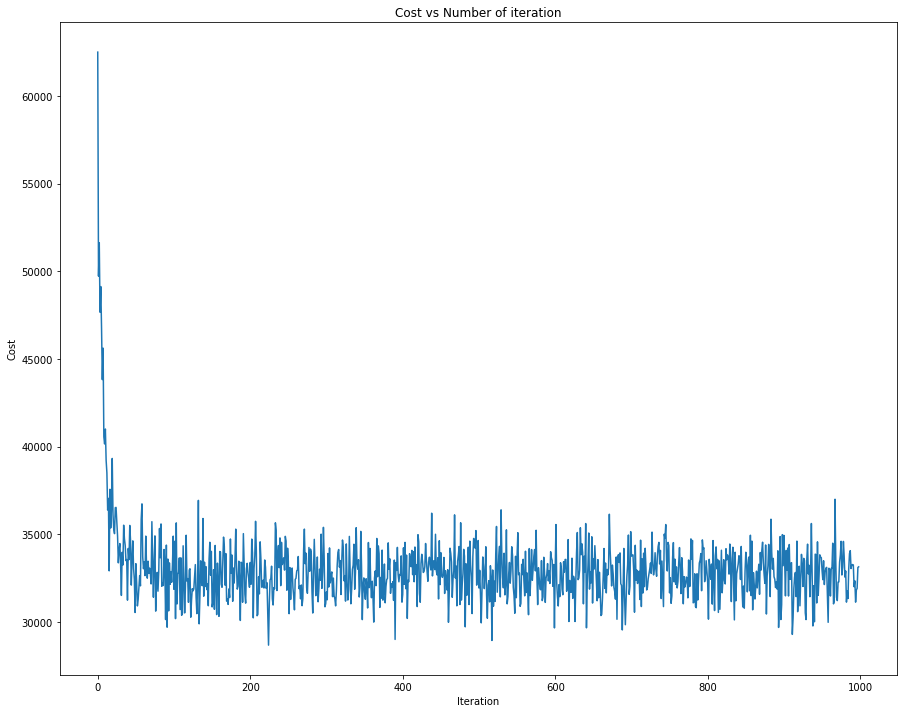

In [865]:
minibatch.plot_cost(cost_rec, stopping)

<h3 style = 'color: blue'>Predicting meter prices using median prices from unique District ids increased accuracy R_squared from 47% to 66%. This is a good sign since we also want to know which distcrict consume more power. </h3>

In [1102]:
grouped_df = hosue_df.groupby('District_id').median()
grouped_df.reset_index(inplace = True)
features = ['Area m2',
             'District_id',
             'Street Width',
             'Driver Room',
             'Extra Unit',
             'Apartments',
             'Bed Rooms',
             'WC',
             'With Stairs',
             'Living Rooms',
             'Servant Room']


X = standardize_houseprize(grouped_df[features], standardize = True)
X = np.c_[np.ones((X.shape[0], 1)), X]
Y = grouped_df[['Price']].values
Y = standardize_houseprize(pd.DataFrame(Y, columns =['prices']), standardize = True).values

0 Area m2
1 District_id
2 Street Width
3 Driver Room
4 Extra Unit
5 Apartments
6 Bed Rooms
7 WC
8 With Stairs
9 Living Rooms
10 Servant Room
0 prices


In [1103]:
iterations = 1000
minibatch = MinibatchGradientDescent()
beta,cost_rec, yhat, stopping = minibatch.minbatchGD(X, Y, beta = np.zeros(X.shape[1]).reshape(-1, 1), alpha = 0.001, iterations = iterations, batch_size = 50, early_stopping=True)

****************************************
0 iteratiion, cost = 59299.155690751206
****************************************
1 iteratiion, cost = 29936.25261520892
****************************************
2 iteratiion, cost = 40817.45221945398
****************************************
3 iteratiion, cost = 45350.13800252011
****************************************
4 iteratiion, cost = 34124.55299719421
****************************************
5 iteratiion, cost = 12537.41626412218
****************************************
6 iteratiion, cost = 34276.94118607197
****************************************
7 iteratiion, cost = 36334.11778790776
****************************************
8 iteratiion, cost = 17154.25072658903
****************************************
9 iteratiion, cost = 14905.59570180625
****************************************
10 iteratiion, cost = 27780.13916096643
****************************************
11 iteratiion, cost = 22390.569783548937
************************************

****************************************
199 iteratiion, cost = 17985.11589111976
****************************************
200 iteratiion, cost = 21117.250241685168
****************************************
201 iteratiion, cost = 19867.82882607906
****************************************
202 iteratiion, cost = 11645.090854521277
****************************************
203 iteratiion, cost = 21489.680663795454
****************************************
204 iteratiion, cost = 21060.101862503292
****************************************
205 iteratiion, cost = 18912.576694192023
****************************************
206 iteratiion, cost = 18170.840663378
****************************************
207 iteratiion, cost = 15130.31915611944
****************************************
208 iteratiion, cost = 21047.114567313867
****************************************
209 iteratiion, cost = 14932.155101081535
****************************************
210 iteratiion, cost = 10853.819146107864
**********

****************************************
378 iteratiion, cost = 20449.843734588412
****************************************
379 iteratiion, cost = 20701.103582439362
****************************************
380 iteratiion, cost = 19339.81338636931
****************************************
381 iteratiion, cost = 20217.378557008764
****************************************
382 iteratiion, cost = 16769.92841590095
****************************************
383 iteratiion, cost = 17814.18137142824
****************************************
384 iteratiion, cost = 14061.153811651577
****************************************
385 iteratiion, cost = 17977.49913406641
****************************************
386 iteratiion, cost = 15413.866854895494
****************************************
387 iteratiion, cost = 19877.64103995521
****************************************
388 iteratiion, cost = 20030.140831052602
****************************************
389 iteratiion, cost = 13239.448711633211
*********

****************************************
577 iteratiion, cost = 16320.227750537031
****************************************
578 iteratiion, cost = 13359.838969978851
****************************************
579 iteratiion, cost = 17117.28205933608
****************************************
580 iteratiion, cost = 21420.294879406698
****************************************
581 iteratiion, cost = 20220.26219024583
****************************************
582 iteratiion, cost = 17023.549041764738
****************************************
583 iteratiion, cost = 19289.512344283055
****************************************
584 iteratiion, cost = 19954.746669329645
****************************************
585 iteratiion, cost = 20517.441727947014
****************************************
586 iteratiion, cost = 18128.56688786135
****************************************
587 iteratiion, cost = 19776.721286858956
****************************************
588 iteratiion, cost = 12585.583341558764
*******

****************************************
775 iteratiion, cost = 15100.606554375147
****************************************
776 iteratiion, cost = 16797.77745940293
****************************************
777 iteratiion, cost = 16800.774998119257
****************************************
778 iteratiion, cost = 20099.77573645694
****************************************
779 iteratiion, cost = 20397.652684276454
****************************************
780 iteratiion, cost = 16560.720741512207
****************************************
781 iteratiion, cost = 19086.455630106804
****************************************
782 iteratiion, cost = 20549.944880389237
****************************************
783 iteratiion, cost = 21505.953096815363
****************************************
784 iteratiion, cost = 20324.287428417967
****************************************
785 iteratiion, cost = 20229.422003718246
****************************************
786 iteratiion, cost = 15232.952074453695
******

****************************************
980 iteratiion, cost = 18724.770634093013
****************************************
981 iteratiion, cost = 20971.267197808633
****************************************
982 iteratiion, cost = 19278.760350326316
****************************************
983 iteratiion, cost = 13638.465195536935
****************************************
984 iteratiion, cost = 19183.89372704951
****************************************
985 iteratiion, cost = 20728.488357287588
****************************************
986 iteratiion, cost = 18293.041362876447
****************************************
987 iteratiion, cost = 16084.545015187869
****************************************
988 iteratiion, cost = 21308.004464116795
****************************************
989 iteratiion, cost = 21290.933194109653
****************************************
990 iteratiion, cost = 20712.59416452142
****************************************
991 iteratiion, cost = 19514.957573582637
******

In [1104]:
minibatch.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.5821642420624983
****************************************
MSE: 0.33891520473620307
****************************************
MAE: 0.24169114531396274
****************************************
R_squared = 0.6610847952637968
****************************************


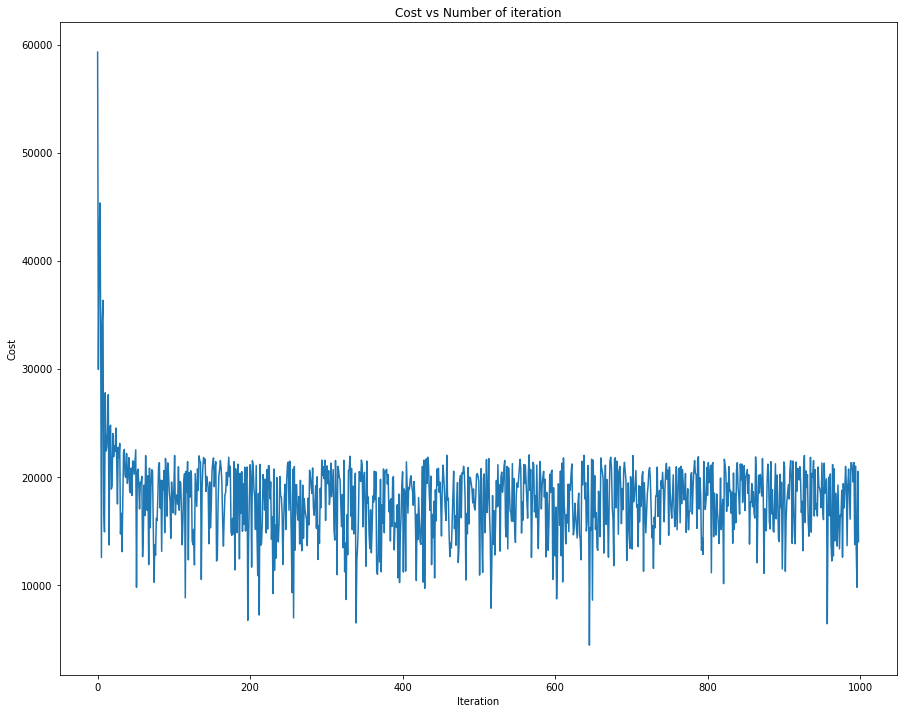

In [1105]:
minibatch.plot_cost(cost_rec, stopping)

No handles with labels found to put in legend.


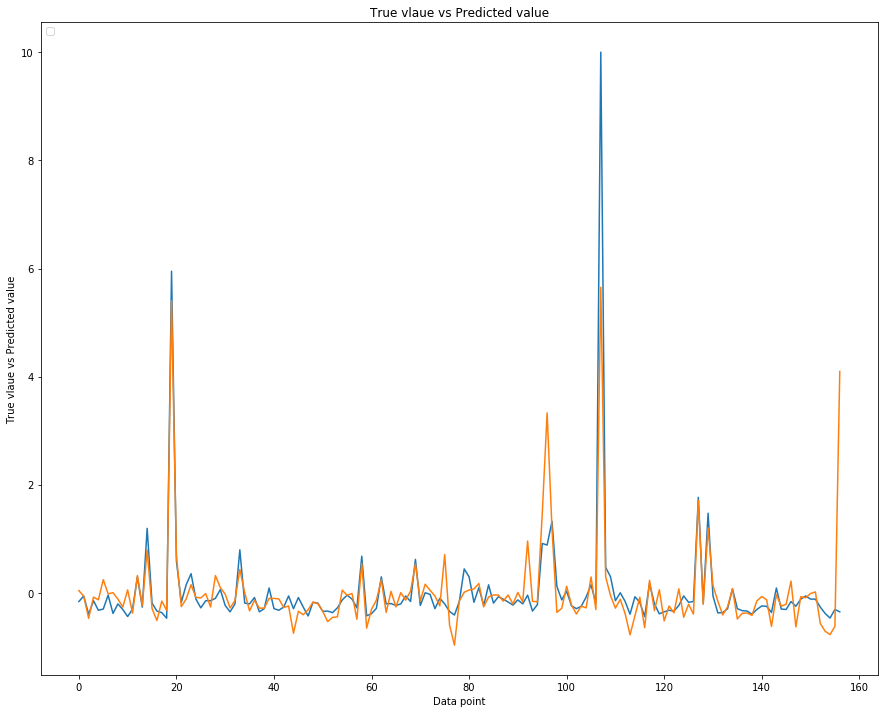

In [1106]:
minibatch.plot(X, Y, yhat)

<h4 style = 'color: red'>It turns out clustering the data doesnt do much good. Infact, it made our prediction model flawed</h4>

In [1089]:
new_y = hosue_df.copy(deep = True)
new_y['label'] = y_means
new_y = new_y[new_y.label == 1]
kmeans_df = hosue_df[features]
kmeans_df['label'] = y_means
kmeans_df = standardize_houseprize(kmeans_df[kmeans_df.label == 1].drop(['label'], axis = 1), standardize=True)
X = np.c_[np.ones((kmeans_df.shape[0], 1)), kmeans_df]
Y = new_y[['Price']].values
Y.shape

0 Area m2
1 District_id
2 Street Width
3 Driver Room
4 Extra Unit
5 Apartments
6 Bed Rooms
7 WC
8 With Stairs
9 Living Rooms
10 Servant Room


(104664, 1)

In [1093]:
iterations = 1000
gd = GradientDescent()
beta,cost_rec,theta_rec, yhat, stopping = gd.GD(X, Y, beta = np.zeros(X.shape[1]).reshape(-1, 1), alpha = 0.1, iterations = iterations, early_stopping=True)


****************************************
0 iteratiion, cost = 7.944817561667184e+31
****************************************
1 iteratiion, cost = 7.919340535826487e+31
****************************************
2 iteratiion, cost = 7.898755686024412e+31
****************************************
3 iteratiion, cost = 7.882119605617496e+31
****************************************
4 iteratiion, cost = 7.868671802137077e+31
****************************************
5 iteratiion, cost = 7.857798984064068e+31
****************************************
6 iteratiion, cost = 7.8490063837102835e+31
****************************************
7 iteratiion, cost = 7.841894713785265e+31
****************************************
8 iteratiion, cost = 7.836141638906226e+31
****************************************
9 iteratiion, cost = 7.8314868685431485e+31
****************************************
10 iteratiion, cost = 7.827720156992245e+31
****************************************
11 iteratiion, cost = 7.82467163

In [1094]:
gd.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 119423592815.59651
****************************************
MSE: 1.4261994520985396e+22
****************************************
MAE: 4890145753.832557
****************************************
R_squared = 0.0203608428673695
****************************************


In [1182]:
def synthetic_var(df, n_power = 2):
    df = df.copy(deep = True)
    district = df.District_id.values
    if 'District_id' in df.columns:
        df = df.drop(['District_id'], axis = 1)
    for ii in df.columns:
        df['{}_s2'.format(ii)] = np.power(df[[ii]].values, n_power)
    df['District_id'] = district
    return df

In [1183]:
X = hosue_df.copy(deep = True)[features]
X = synthetic_var(X)
X = standardize_houseprize(X, standardize = True)
X = np.c_[np.ones((X.shape[0], 1)), X]
Y = hosue_df[['Price']].values
Y = standardize_houseprize(pd.DataFrame(Y, columns =['prices']), standardize = True).values

0 Area m2
1 Street Width
2 Driver Room
3 Extra Unit
4 Apartments
5 Bed Rooms
6 WC
7 With Stairs
8 Living Rooms
9 Servant Room
10 Area m2_s2
11 Street Width_s2
12 Driver Room_s2
13 Extra Unit_s2
14 Apartments_s2
15 Bed Rooms_s2
16 WC_s2
17 With Stairs_s2
18 Living Rooms_s2
19 Servant Room_s2
20 District_id
0 prices


In [1184]:
iterations = 1000
gd = GradientDescent()
beta,cost_rec,theta_rec, yhat, stopping = gd.GD(X, Y, beta = np.zeros(X.shape[1]).reshape(-1, 1), alpha = 0.1, iterations = iterations, early_stopping=True)

****************************************
0 iteratiion, cost = 12137972138.759022
****************************************
1 iteratiion, cost = 12070126177.837433
****************************************
2 iteratiion, cost = 12026495494.237167
****************************************
3 iteratiion, cost = 11998352653.400198
****************************************
4 iteratiion, cost = 11980137678.839098
****************************************
5 iteratiion, cost = 11968300452.859903
****************************************
6 iteratiion, cost = 11960569821.692163
****************************************
7 iteratiion, cost = 11955490139.441284
****************************************
8 iteratiion, cost = 11952126652.48319
****************************************
9 iteratiion, cost = 11949877870.410442
****************************************
10 iteratiion, cost = 11948355882.242212
****************************************
11 iteratiion, cost = 11947309896.565172
***************************

****************************************
115 iteratiion, cost = 11940296362.432184
****************************************
116 iteratiion, cost = 11940269583.91214
****************************************
117 iteratiion, cost = 11940243009.278181
****************************************
118 iteratiion, cost = 11940216636.262968
****************************************
119 iteratiion, cost = 11940190462.636908
****************************************
120 iteratiion, cost = 11940164486.207336
****************************************
121 iteratiion, cost = 11940138704.817732
****************************************
122 iteratiion, cost = 11940113116.346928
****************************************
123 iteratiion, cost = 11940087718.708385
****************************************
124 iteratiion, cost = 11940062509.849415
****************************************
125 iteratiion, cost = 11940037487.750525
****************************************
126 iteratiion, cost = 11940012650.424637
*****

****************************************
229 iteratiion, cost = 11938181938.118916
****************************************
230 iteratiion, cost = 11938169415.267736
****************************************
231 iteratiion, cost = 11938156968.169884
****************************************
232 iteratiion, cost = 11938144596.293133
****************************************
233 iteratiion, cost = 11938132299.110132
****************************************
234 iteratiion, cost = 11938120076.09844
****************************************
235 iteratiion, cost = 11938107926.74037
****************************************
236 iteratiion, cost = 11938095850.522982
****************************************
237 iteratiion, cost = 11938083846.937977
****************************************
238 iteratiion, cost = 11938071915.481672
****************************************
239 iteratiion, cost = 11938060055.654907
****************************************
240 iteratiion, cost = 11938048266.962997
******

****************************************
349 iteratiion, cost = 11937101525.780918
****************************************
350 iteratiion, cost = 11937095288.188747
****************************************
351 iteratiion, cost = 11937089085.4312
****************************************
352 iteratiion, cost = 11937082917.295233
****************************************
353 iteratiion, cost = 11937076783.569223
****************************************
354 iteratiion, cost = 11937070684.042934
****************************************
355 iteratiion, cost = 11937064618.507553
****************************************
356 iteratiion, cost = 11937058586.755598
****************************************
357 iteratiion, cost = 11937052588.580988
****************************************
358 iteratiion, cost = 11937046623.77898
****************************************
359 iteratiion, cost = 11937040692.146189
****************************************
360 iteratiion, cost = 11937034793.480553
*******

****************************************
469 iteratiion, cost = 11936551734.832333
****************************************
470 iteratiion, cost = 11936548479.310532
****************************************
471 iteratiion, cost = 11936545240.753082
****************************************
472 iteratiion, cost = 11936542019.060514
****************************************
473 iteratiion, cost = 11936538814.133951
****************************************
474 iteratiion, cost = 11936535625.87515
****************************************
475 iteratiion, cost = 11936532454.186462
****************************************
476 iteratiion, cost = 11936529298.970837
****************************************
477 iteratiion, cost = 11936526160.131819
****************************************
478 iteratiion, cost = 11936523037.573555
****************************************
479 iteratiion, cost = 11936519931.200766
****************************************
480 iteratiion, cost = 11936516840.918783
*****

****************************************
589 iteratiion, cost = 11936258630.618938
****************************************
590 iteratiion, cost = 11936256844.774517
****************************************
591 iteratiion, cost = 11936255067.415323
****************************************
592 iteratiion, cost = 11936253298.493519
****************************************
593 iteratiion, cost = 11936251537.961544
****************************************
594 iteratiion, cost = 11936249785.772125
****************************************
595 iteratiion, cost = 11936248041.878286
****************************************
596 iteratiion, cost = 11936246306.233316
****************************************
597 iteratiion, cost = 11936244578.790794
****************************************
598 iteratiion, cost = 11936242859.504576
****************************************
599 iteratiion, cost = 11936241148.3288
****************************************
600 iteratiion, cost = 11936239445.217865
******

****************************************
705 iteratiion, cost = 11936097749.045748
****************************************
706 iteratiion, cost = 11936096690.211891
****************************************
707 iteratiion, cost = 11936095635.85289
****************************************
708 iteratiion, cost = 11936094585.944809
****************************************
709 iteratiion, cost = 11936093540.46388
****************************************
710 iteratiion, cost = 11936092499.386463
****************************************
711 iteratiion, cost = 11936091462.68906
****************************************
712 iteratiion, cost = 11936090430.348307
****************************************
713 iteratiion, cost = 11936089402.340979
****************************************
714 iteratiion, cost = 11936088378.643997
****************************************
715 iteratiion, cost = 11936087359.234411
****************************************
716 iteratiion, cost = 11936086344.0894
*********

****************************************
821 iteratiion, cost = 11935999594.584171
****************************************
822 iteratiion, cost = 11935998925.61978
****************************************
823 iteratiion, cost = 11935998259.111006
****************************************
824 iteratiion, cost = 11935997595.045689
****************************************
825 iteratiion, cost = 11935996933.411745
****************************************
826 iteratiion, cost = 11935996274.197117
****************************************
827 iteratiion, cost = 11935995617.38987
****************************************
828 iteratiion, cost = 11935994962.978094
****************************************
829 iteratiion, cost = 11935994310.949987
****************************************
830 iteratiion, cost = 11935993661.293783
****************************************
831 iteratiion, cost = 11935993013.997793
****************************************
832 iteratiion, cost = 11935992369.0504
********

****************************************
940 iteratiion, cost = 11935934381.160833
****************************************
941 iteratiion, cost = 11935933935.12947
****************************************
942 iteratiion, cost = 11935933490.49727
****************************************
943 iteratiion, cost = 11935933047.257986
****************************************
944 iteratiion, cost = 11935932605.405413
****************************************
945 iteratiion, cost = 11935932164.933378
****************************************
946 iteratiion, cost = 11935931725.835743
****************************************
947 iteratiion, cost = 11935931288.106407
****************************************
948 iteratiion, cost = 11935930851.739313
****************************************
949 iteratiion, cost = 11935930416.728403
****************************************
950 iteratiion, cost = 11935929983.067673
****************************************
951 iteratiion, cost = 11935929550.751158
******

In [1185]:
gd.summary(X, Y, yhat)

****************************************
		Summary
****************************************
RMSE: 0.9873475577624238
****************************************
MSE: 0.9748551998194227
****************************************
MAE: 0.047190158875061436
****************************************
R_squared = 0.025144800180577742
****************************************


In [1193]:
from sklearn.svm import SVR

In [1196]:
pred = SVR(C=1, gamma=10).fit(X, Y)

In [1201]:
pred = pred.predict(X)

In [1203]:
pred

array([-0.9451518 ,  2.03130269, -0.42024797, ..., -0.80098416,
       -0.25845144, -0.56586105])

No handles with labels found to put in legend.


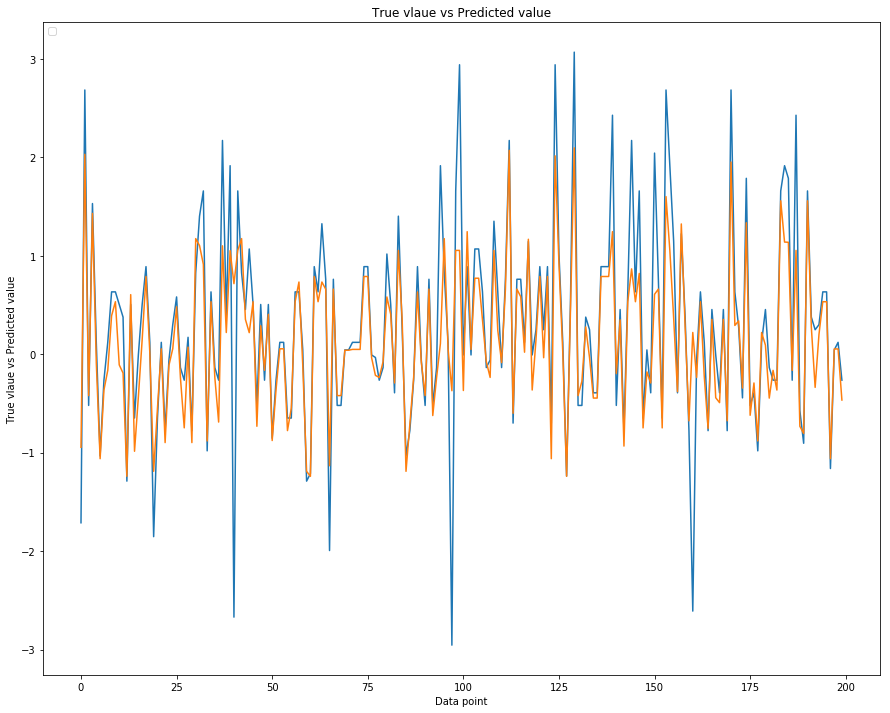

In [1206]:
minibatch.plot(X[:200], Y[:200], pred[:200])

In [1207]:
minibatch.summary(X, Y, pred)

****************************************
		Summary
****************************************


MemoryError: 